In [2]:
library(ggplot2)
library(viridis)
library(reshape2)
library(lubridate)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Loading required package: viridisLite

Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



In [1]:
library(sp)

Warning message:
“package ‘sp’ was built under R version 3.6.2”

In [3]:
d = read.csv("https://raw.githubusercontent.com/data-visualization-society/datavizsociety/master/challenge_data/dvs_challenge_3_membership_anniversary/dvs_challenge_3_membership_anniversary.csv",
            stringsAsFactors = F)

In [4]:
str(d)

'data.frame':	11573 obs. of  6 variables:
 $ lat          : num  37 42.3 42.3 19.1 43.6 ...
 $ long         : num  -122 -83.7 -83.7 72.9 -79.4 ...
 $ data         : num  2.67 2 3.67 3.67 3.33 3 2 2.33 4 4 ...
 $ visualization: num  3.67 3.33 3.33 3.33 3 3 3.67 3.33 3 3.33 ...
 $ society      : num  4.33 4.33 1.33 2.67 3.33 1.67 2.33 2.67 3.33 3 ...
 $ date         : chr  "2/20/2019" "2/20/2019" "2/20/2019" "2/20/2019" ...


In [5]:
d$date = as.Date(d$date, ,format="%m/%d/%Y")

In [6]:
d$week = week(d$date)

In [61]:
head(d)

lat   long    data visualization society date       week
1 36.97 -122.03 2.67 3.67          4.33    2019-02-20 8   
2 42.28  -83.74 2.00 3.33          4.33    2019-02-20 8   
3 42.28  -83.74 3.67 3.33          1.33    2019-02-20 8   
4 19.08   72.88 3.67 3.33          2.67    2019-02-20 8   
5 43.65  -79.38 3.33 3.00          3.33    2019-02-20 8   
6 39.74 -104.99 3.00 3.00          1.67    2019-02-20 8

Warning message:
“Removed 256 rows containing missing values (geom_point).”

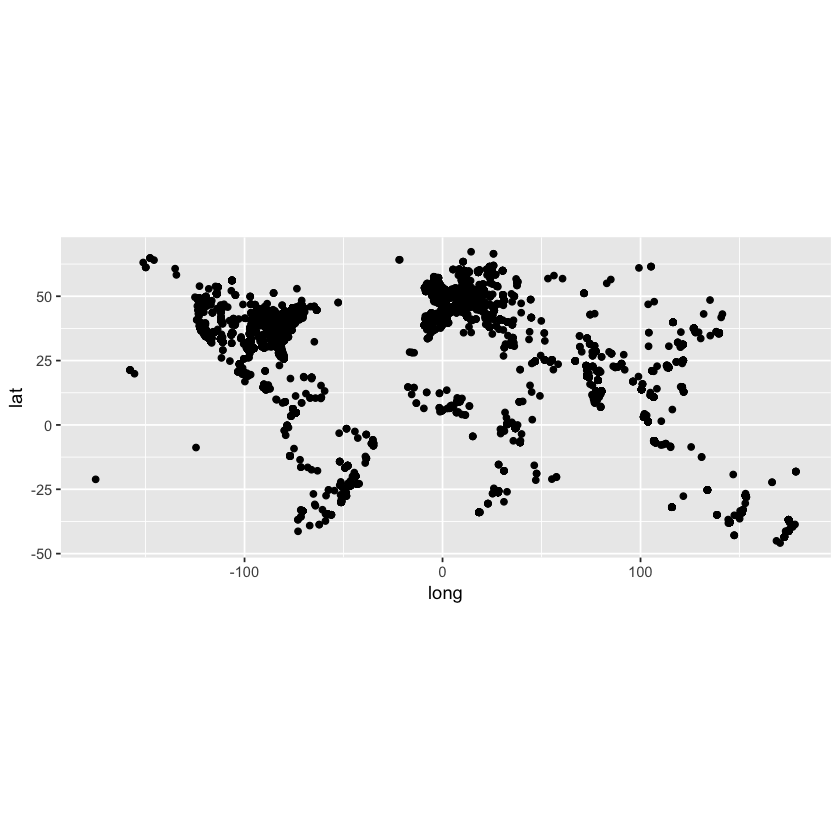

In [22]:
ggplot(data = d)+
geom_point(aes(x=long, y=lat))+
coord_fixed(1.3)

In [23]:
names(d)

[1] "lat"           "long"          "data"          "visualization"
[5] "society"       "date"

In [64]:
d_long = melt(d, id.vars = c("date","lat", "long", "week"))
head(d_long)
summary(d_long)

date       lat   long    week variable value
1 2019-02-20 36.97 -122.03 8    data     2.67 
2 2019-02-20 42.28  -83.74 8    data     2.00 
3 2019-02-20 42.28  -83.74 8    data     3.67 
4 2019-02-20 19.08   72.88 8    data     3.67 
5 2019-02-20 43.65  -79.38 8    data     3.33 
6 2019-02-20 39.74 -104.99 8    data     3.00

      date                 lat              long              week      
 Min.   :2019-02-20   Min.   :-45.88   Min.   :-175.20   Min.   : 1.00  
 1st Qu.:2019-03-04   1st Qu.: 33.75   1st Qu.: -86.91   1st Qu.: 8.00  
 Median :2019-05-21   Median : 40.46   Median : -73.57   Median :13.00  
 Mean   :2019-06-17   Mean   : 34.53   Mean   : -35.36   Mean   :19.66  
 3rd Qu.:2019-09-16   3rd Qu.: 47.56   3rd Qu.:   7.05   3rd Qu.:30.00  
 Max.   :2020-02-18   Max.   : 67.28   Max.   : 178.45   Max.   :53.00  
                      NA's   :768      NA's   :768                      
          variable         value      
 data         :11573   Min.   :0.000  
 visualization:11573   1st Qu.:1.670  
 society      :11573   Median :2.670  
                       Mean   :2.554  
                       3rd Qu.:3.330  
                       Max.   :5.000  
                                      

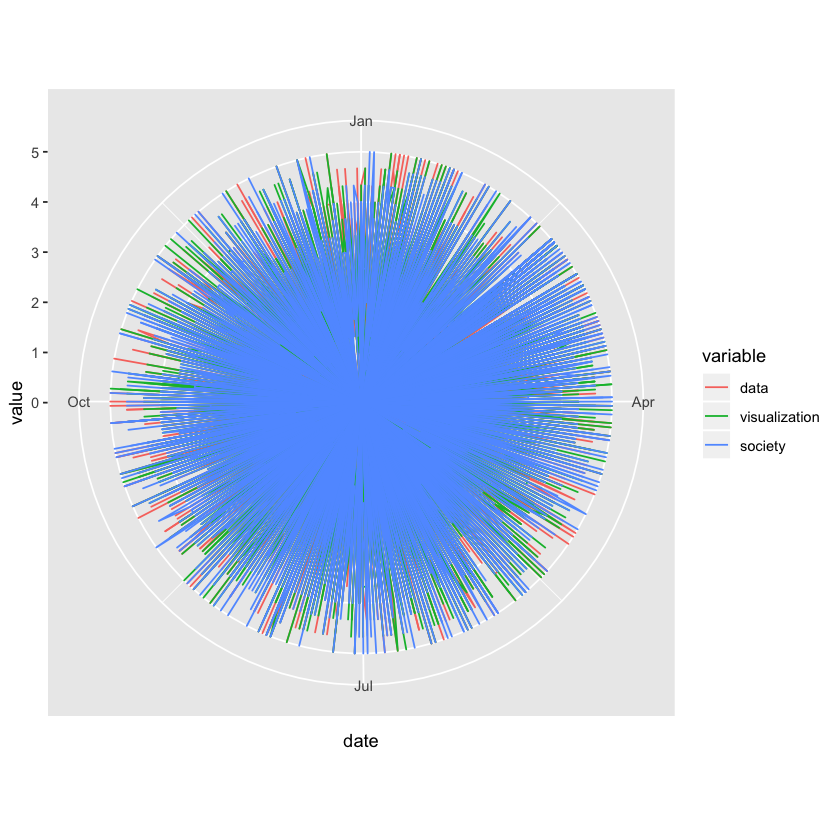

In [28]:
ggplot(data = d_long)+
geom_line(aes(x=date, y=value, colour=variable))+
coord_polar(theta = "x", direction=1 ) 

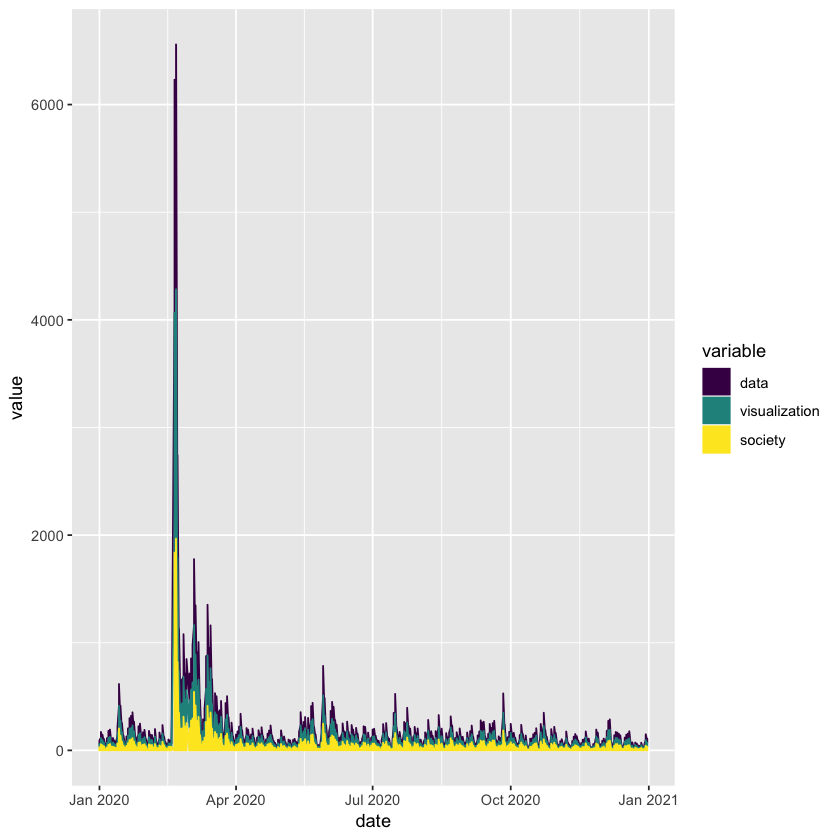

In [42]:
ggplot(data = d_long)+
geom_area(aes(x=date, y=value, colour=variable, fill=variable))+
scale_colour_viridis(discrete = T)+
scale_fill_viridis(discrete = T)


For each week, get the mean and sd of the three describers and then use ribbon. 

In [84]:
d_week = dcast(d_long, formula = week~variable,fun.aggregate = mean)
head(d_week)
d_week_long = melt(d_week, id.var = "week")
head(d_week_long)

week data     visualization society 
1 1    2.565169 2.508390      2.228644
2 2    2.495775 2.513048      2.375829
3 3    2.502438 2.593831      2.421592
4 4    2.674528 2.622594      2.411792
5 5    2.514488 2.538268      2.367165
6 6    2.382069 2.419052      2.278621

week variable value   
1 1    data     2.565169
2 2    data     2.495775
3 3    data     2.502438
4 4    data     2.674528
5 5    data     2.514488
6 6    data     2.382069

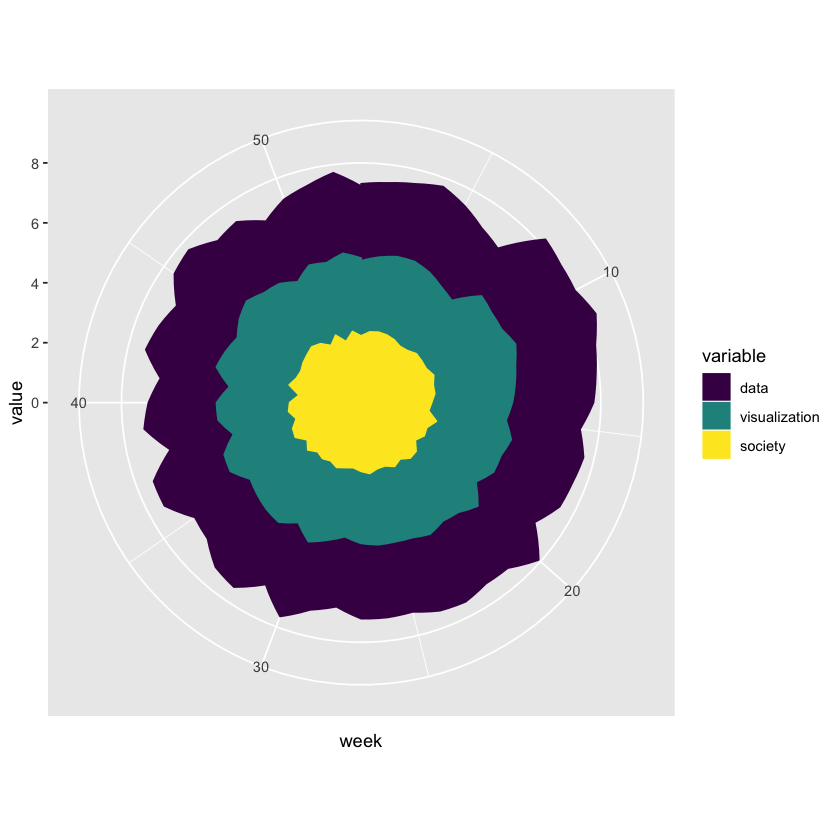

In [72]:
ggplot(data = d_week_long)+
geom_area(aes(x=week, y=value, colour=variable, fill=variable))+
scale_colour_viridis(discrete = T)+
scale_fill_viridis(discrete = T)+
coord_polar(theta = "x", direction=1 ) 
#this should be done with percentages as y axis, to show what is that dominates

In [85]:
d_week_sd = dcast(d_long, formula = week~variable,fun.aggregate = sd)
head(d_week_sd)
d_week_sd_long = melt(d_week_sd, id.var = "week")
head(d_week_sd_long)

week data     visualization society 
1 1    1.282413 1.191391      1.338823
2 2    1.361381 1.278163      1.241187
3 3    1.346766 1.275007      1.266724
4 4    1.236043 1.179692      1.298621
5 5    1.317331 1.111287      1.272591
6 6    1.199181 1.173070      1.268976

week variable value   
1 1    data     1.282413
2 2    data     1.361381
3 3    data     1.346766
4 4    data     1.236043
5 5    data     1.317331
6 6    data     1.199181

In [86]:
head(d_week_sd_long)
head(d_week_long)

week variable value   
1 1    data     1.282413
2 2    data     1.361381
3 3    data     1.346766
4 4    data     1.236043
5 5    data     1.317331
6 6    data     1.199181

week variable value   
1 1    data     2.565169
2 2    data     2.495775
3 3    data     2.502438
4 4    data     2.674528
5 5    data     2.514488
6 6    data     2.382069

In [87]:
names(d_week_sd_long)=c("week", "variable", "sd")
names(d_week_long)=c("week", "variable", "mean")

In [90]:
d_week_mean_sd=data.frame(d_week_long,sd = d_week_sd_long$sd)

In [91]:
head(d_week_mean_sd)

week variable mean     sd      
1 1    data     2.565169 1.282413
2 2    data     2.495775 1.361381
3 3    data     2.502438 1.346766
4 4    data     2.674528 1.236043
5 5    data     2.514488 1.317331
6 6    data     2.382069 1.199181

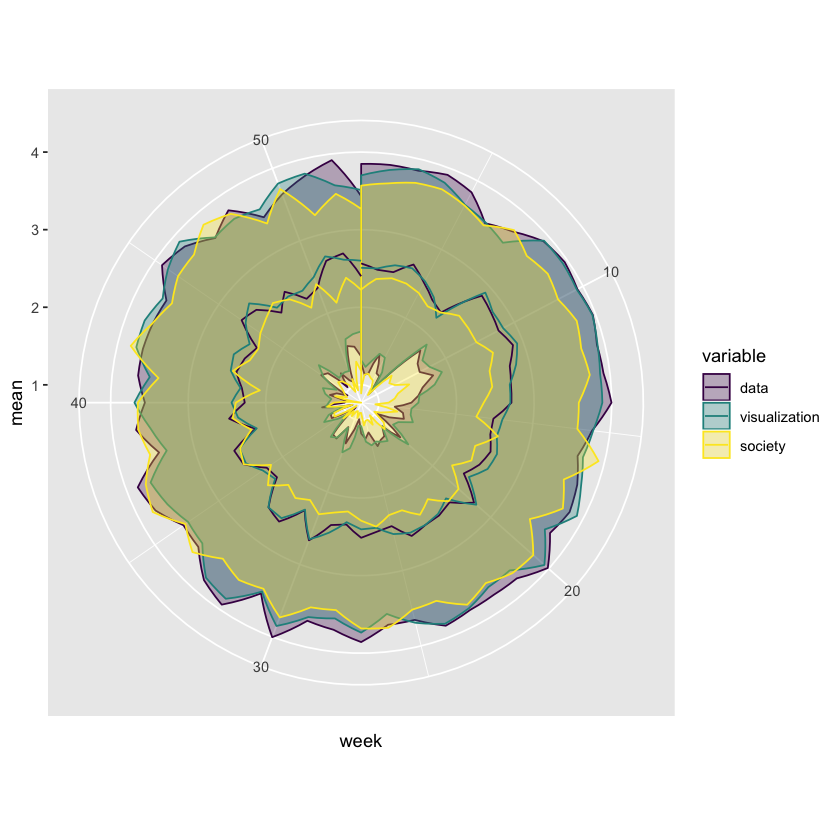

In [94]:
ggplot(data = d_week_mean_sd, aes (x = week))+
geom_ribbon(aes(ymin = mean - sd, ymax = mean + sd, fill = variable, colour=variable), alpha=0.3) +
  geom_line(aes(y = mean,  colour=variable))+
scale_colour_viridis(discrete = T)+
scale_fill_viridis(discrete = T)+
coord_polar(theta = "x", direction=1 ) 

In [97]:
d_week_count = dcast(d_long, formula = week~variable,fun.aggregate = length)
head(d_week_count)
d_week_count_long = melt(d_week_count, id.var = "week")
head(d_week_count_long)


week data visualization society
1 1    118  118           118    
2 2    187  187           187    
3 3    201  201           201    
4 4    212  212           212    
5 5    127  127           127    
6 6    116  116           116

week variable value
1 1    data     118  
2 2    data     187  
3 3    data     201  
4 4    data     212  
5 5    data     127  
6 6    data     116

In [99]:
d_week_mean_sd_count=data.frame(d_week_long,sd = d_week_sd_long$sd, count = d_week_count_long$value)
head(d_week_mean_sd_count)

week variable mean     sd       count
1 1    data     2.565169 1.282413 118  
2 2    data     2.495775 1.361381 187  
3 3    data     2.502438 1.346766 201  
4 4    data     2.674528 1.236043 212  
5 5    data     2.514488 1.317331 127  
6 6    data     2.382069 1.199181 116

In [ ]:
ggplot(data = d_week_mean_sd_count)+
geom_area(aes(x=week, y=value, colour=variable, fill=variable))+
scale_colour_viridis(discrete = T)+
scale_fill_viridis(discrete = T)+
coord_polar(theta = "x", direction=1 ) 

For each month one line, x axis goes from 1 to 31. For each type of trait 12 lines (the number of months, probably 11 lines)


## Getting the country information in R studio because my lab doesn't want to install `rgdal`
``` {r}
library(rgdal)

d = read.csv("https://raw.githubusercontent.com/data-visualization-society/datavizsociety/master/challenge_data/dvs_challenge_3_membership_anniversary/dvs_challenge_3_membership_anniversary.csv",
             stringsAsFactors = F)
d$date = as.Date(d$date, ,format="%m/%d/%Y")
d$week = week(d$date)

coord = d[,c('long','lat')]
coord = coord[which(!is.na(coord$long)),]
pts = SpatialPoints(coord)

world = readOGR(dsn = "/Users/gretacvega/Documents/GitHub/vizzWork/MOL/country_data" , layer = "gadm36_0")

proj4string(pts) = proj4string(world)
countries = over(pts, world)
coord$GID_0 = as.character(countries$GID_0)
coord$NAME_0 = as.character(countries$NAME_0)
d$GID_0 = NA
d$NAME_0 = NA
d$GID_0[which(!is.na(d$long))]=coord$GID_0
d$NAME_0[which(!is.na(d$long))]=coord$NAME_0

write.csv(d, "/Users/gretacvega/Documents/GitHub/dvs/d_gadm.csv")
```

In [66]:
library(plyr)
library(dplyr)
library(reshape2)
library(tidyr)


Attaching package: ‘tidyr’

The following object is masked from ‘package:reshape2’:

    smiths



In [275]:
d = read.csv("d_gadm.csv")

In [276]:
d$date = as.Date(d$date, ,format="%Y-%m-%d")

In [280]:
d = d %>% mutate(month = paste0(year(date), "-", ifelse(month(date)>9, month(date),paste0("0",month(date)))))

In [281]:
head(d)

X lat   long    data visualization society date       week GID_0
1 1 36.97 -122.03 2.67 3.67          4.33    2019-02-20 8    USA  
2 2 42.28  -83.74 2.00 3.33          4.33    2019-02-20 8    USA  
3 3 42.28  -83.74 3.67 3.33          1.33    2019-02-20 8    USA  
4 4 19.08   72.88 3.67 3.33          2.67    2019-02-20 8    IND  
5 5 43.65  -79.38 3.33 3.00          3.33    2019-02-20 8    CAN  
6 6 39.74 -104.99 3.00 3.00          1.67    2019-02-20 8    USA  
  NAME_0        month  
1 United States 2019-02
2 United States 2019-02
3 United States 2019-02
4 India         2019-02
5 Canada        2019-02
6 United States 2019-02

Warning message:
“Factor `GID_0` contains implicit NA, consider using `forcats::fct_explicit_na`”

GID_0 count
1 AFG     2  
2 ARE    19  
3 ARG    65  
4 AUS   298  
5 AUT    45  
6 AZE     1

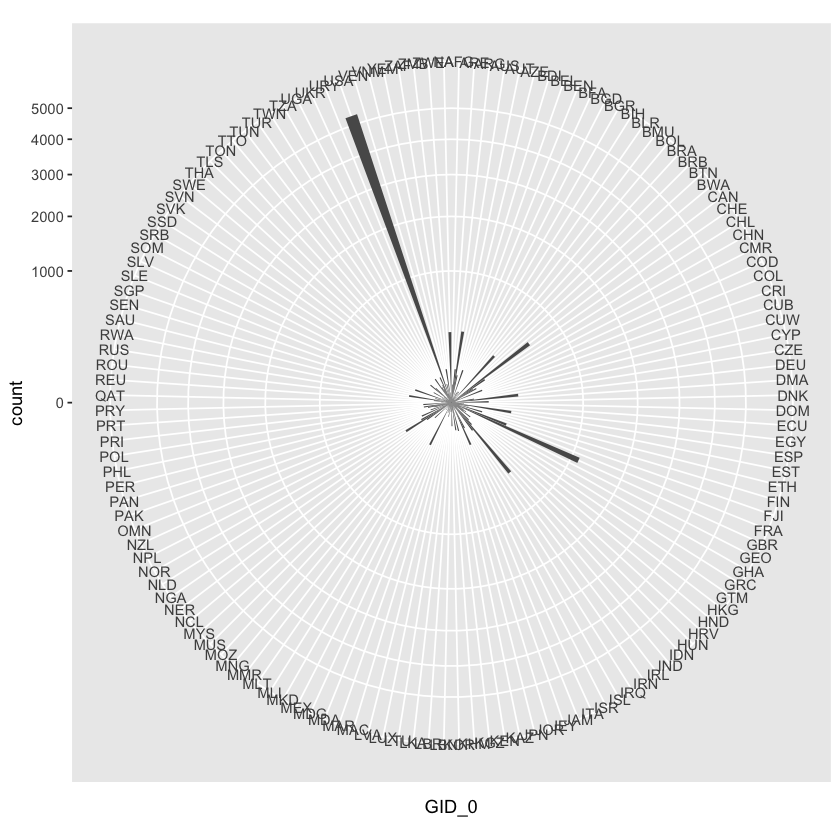

In [282]:
country_count = 
            d %>%
            group_by(GID_0) %>%
            summarize(count=length(GID_0))
head(country_count)
ggplot(country_count)+
    geom_col(aes(x=GID_0, y=count))+
    scale_y_sqrt()+
    coord_polar()

In [283]:
country_count_month = 
            d %>%
            group_by(GID_0, month) %>%
            summarize(count=length(GID_0))
head(country_count_month)

Warning message:
“Factor `GID_0` contains implicit NA, consider using `forcats::fct_explicit_na`”

GID_0 month   count
1 AFG   2019-07 1    
2 AFG   2020-02 1    
3 ARE   2019-02 2    
4 ARE   2019-03 4    
5 ARE   2019-04 1    
6 ARE   2019-06 1

In [152]:
dim(country_count)

[1] 140   2

In [790]:
d_char = d %>%
        select(-lat, -long) %>%
        gather("character","score", data:society) %>% 
        group_by(X) %>% 
        slice(which.max(score)) %>%
        select(X,GID_0, month, week, character, date)
head(d_char)

X GID_0 month   week character date      
1 1 USA   2019-02 8    society   2019-02-20
2 2 USA   2019-02 8    society   2019-02-20
3 3 USA   2019-02 8    data      2019-02-20
4 4 IND   2019-02 8    data      2019-02-20
5 5 CAN   2019-02 8    data      2019-02-20
6 6 USA   2019-02 8    data      2019-02-20

Joining, by = "GID_0"


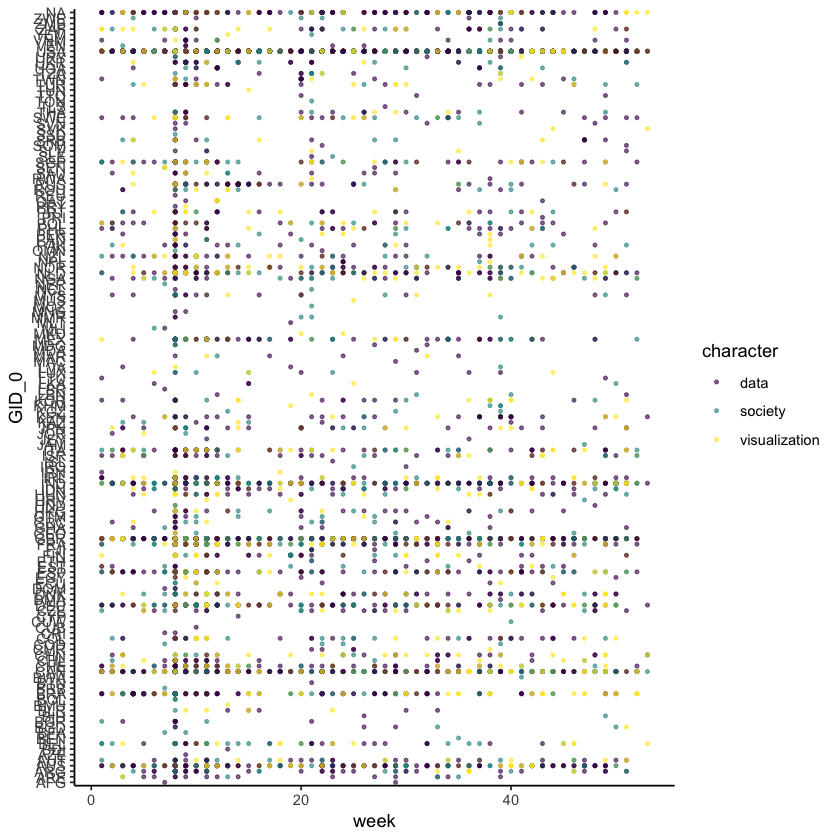

In [679]:
ggplot(d_char)+
    geom_point(aes(x=GID_0, y = week, fill=character, colour=character), alpha = 0.6, shape = 21, size=0.75)+
    scale_fill_viridis(discrete = T)+
    scale_colour_viridis(discrete = T,option = "viridis")+
    theme_classic()+
    coord_flip()


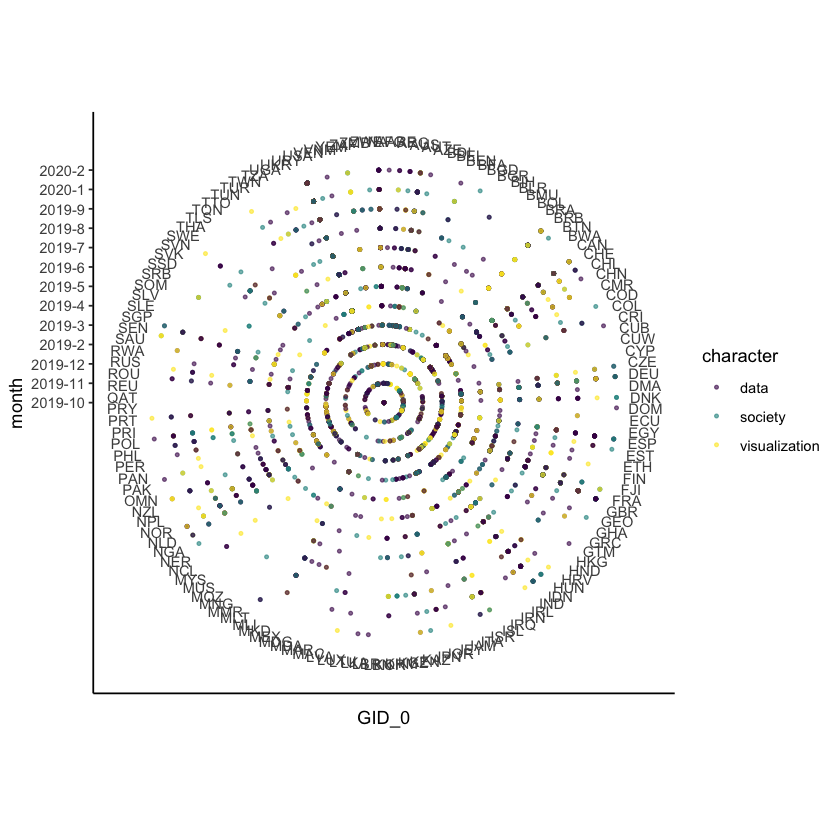

In [273]:
ggplot(d_char)+
    geom_point(aes(x=GID_0, y = month, fill=character, colour=character), alpha = 0.6, shape = 21, size=0.75)+
    scale_fill_viridis(discrete = T)+
    scale_colour_viridis(discrete = T,option = "viridis")+
    theme_classic()+
    coord_polar()

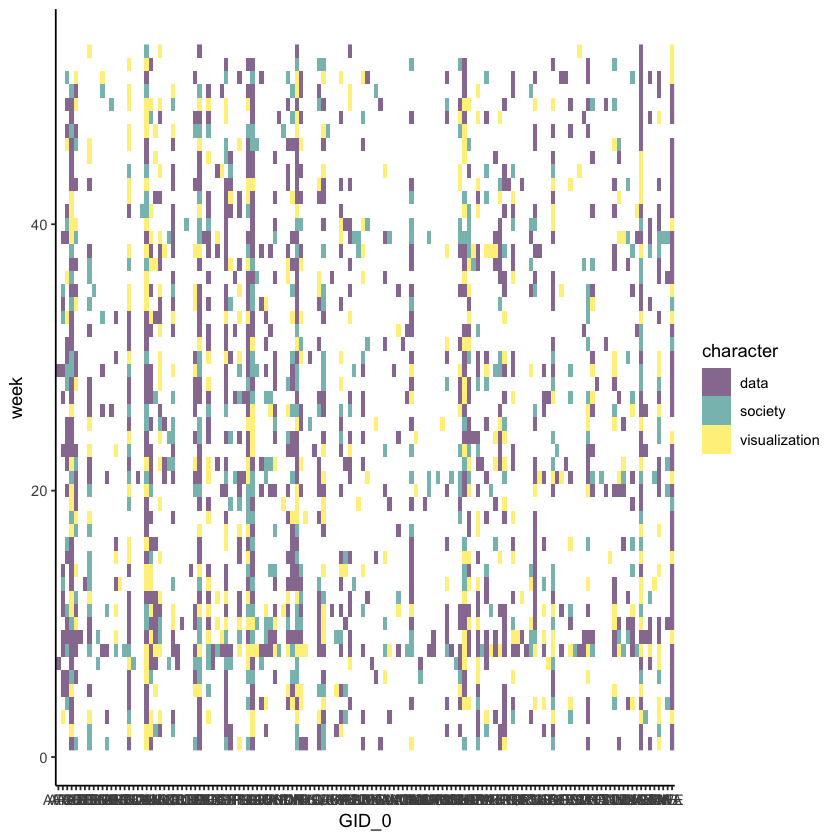

In [112]:
ggplot(d_char)+
    geom_raster(aes(x=GID_0, y = week, fill=character), alpha = 0.6)+
    scale_fill_viridis(discrete = T)+
    scale_colour_viridis(discrete = T,option = "viridis")+
    theme_classic()
    #coord_polar()

In [285]:
d_all = d_char %>%
        select(X, character) %>%
        inner_join(d, by = "X")

In [286]:
head(d_all)

X character lat   long    data visualization society date       week GID_0
1 1 society   36.97 -122.03 2.67 3.67          4.33    2019-02-20 8    USA  
2 2 society   42.28  -83.74 2.00 3.33          4.33    2019-02-20 8    USA  
3 3 data      42.28  -83.74 3.67 3.33          1.33    2019-02-20 8    USA  
4 4 data      19.08   72.88 3.67 3.33          2.67    2019-02-20 8    IND  
5 5 data      43.65  -79.38 3.33 3.00          3.33    2019-02-20 8    CAN  
6 6 data      39.74 -104.99 3.00 3.00          1.67    2019-02-20 8    USA  
  NAME_0        month  
1 United States 2019-02
2 United States 2019-02
3 United States 2019-02
4 India         2019-02
5 Canada        2019-02
6 United States 2019-02

In [118]:
write.csv(d_all, "d_all.csv")

In [287]:
country_perc = d_all %>%
                group_by(GID_0) %>%
                summarize(data_char=sum(character == "data"),
                         vis_char = sum(character == "visualization"),
                         soc_char = sum(character == "society"),
                         count = length(GID_0))%>%
                mutate(data_perc = (data_char/count)*100, vis_perc = (vis_char/count)*100, soc_perc = (soc_char/count)*100)%>%
                select(GID_0, count, data_perc, vis_perc, soc_perc)

Warning message:
“Factor `GID_0` contains implicit NA, consider using `forcats::fct_explicit_na`”

In [138]:
head(country_perc)
tail(country_perc)

GID_0 count data_perc vis_perc  soc_perc
1 AFG     2   100.00000  0.000000  0.00000
2 ARE    19    73.68421  5.263158 21.05263
3 ARG    65    53.84615 20.000000 26.15385
4 AUS   298    55.03356 24.496644 20.46980
5 AUT    45    51.11111 22.222222 26.66667
6 AZE     1   100.00000  0.000000  0.00000

GID_0 count data_perc vis_perc soc_perc
1 VNM    21   66.66667  14.28571 19.04762
2 YEM     2    0.00000  50.00000 50.00000
3 ZAF    66   42.42424  30.30303 27.27273
4 ZMB     3   66.66667   0.00000 33.33333
5 ZWE     6   33.33333   0.00000 66.66667
6 NA    287   65.50523  19.86063 14.63415

In [139]:
write.csv(country_perc, "country_perc.csv")

In [288]:
country_perc_month = d_all %>%
                group_by(GID_0, month) %>%
                summarize(data_char=sum(character == "data"),
                         vis_char = sum(character == "visualization"),
                         soc_char = sum(character == "society"),
                         count = length(GID_0))%>%
                mutate(data_perc = (data_char/count)*100, vis_perc = (vis_char/count)*100, soc_perc = (soc_char/count)*100)%>%
                select(GID_0, month, count, data_perc, vis_perc, soc_perc)

Warning message:
“Factor `GID_0` contains implicit NA, consider using `forcats::fct_explicit_na`”Warning message:
“Factor `GID_0` contains implicit NA, consider using `forcats::fct_explicit_na`”

In [289]:
head(country_perc_month)

GID_0 month   count data_perc vis_perc soc_perc
1 AFG   2019-07 1     100       0         0      
2 AFG   2020-02 1     100       0         0      
3 ARE   2019-02 2     100       0         0      
4 ARE   2019-03 4      75       0        25      
5 ARE   2019-04 1     100       0         0      
6 ARE   2019-06 1     100       0         0

In [144]:
write.csv(country_perc_month, "country_perc_month.csv")

In [290]:
d_all$character = as.factor(d_all$character)

# For each month and each country calculate the incremental in time of the dominant character
help came for [donought](https://stackoverflow.com/questions/13887365/circular-heatmap-that-looks-like-a-donut) and [labels around](https://www.r-graph-gallery.com/296-add-labels-to-circular-barplot.html) and [getting the nth week of the month](https://stackoverflow.com/questions/25199851/r-how-to-get-the-week-number-of-the-month)

In [609]:
library(forcats)
library(extrafont)

Registering fonts with R


In [610]:
#font_import()

Importing fonts may take a few minutes, depending on the number of fonts and the speed of the system.
Continue? [y/n]  y


Scanning ttf files in /Library/Fonts/, /System/Library/Fonts, ~/Library/Fonts/ ...
Extracting .afm files from .ttf files...
/System/Library/Fonts/Supplemental/Arial Unicode.ttf => /opt/anaconda3/envs/r-env/lib/R/library/extrafontdb/metrics/Arial Unicode
/System/Library/Fonts/Apple Braille Outline 6 Dot.ttf => /opt/anaconda3/envs/r-env/lib/R/library/extrafontdb/metrics/Apple Braille Outline 6 Dot
/System/Library/Fonts/Apple Braille Outline 8 Dot.ttf => /opt/anaconda3/envs/r-env/lib/R/library/extrafontdb/metrics/Apple Braille Outline 8 Dot
/System/Library/Fonts/Apple Braille Pinpoint 6 Dot.ttf => /opt/anaconda3/envs/r-env/lib/R/library/extrafontdb/metrics/Apple Braille Pinpoint 6 Dot
/System/Library/Fonts/Apple Braille Pinpoint 8 Dot.ttf => /opt/anaconda3/envs/r-env/lib/R/library/extrafontdb/metrics/Apple Braille Pinpoint 8 Dot
/System/Library/Fonts/Apple Braille.ttf => /opt/anaconda3/envs/r-env/lib/R/library/extrafontdb/metrics/Apple Braille
/System/Library/Fonts/Apple Symbols.ttfWarnin

In [612]:
#fonts()

In [292]:
dd = d_all %>% 
    select(-lat,-long, -data, -visualization, -society, -date, -week) 
months = unique(dd$month)

In [235]:
getmode <- function(x) {names(which.max(table(x)))
}

In [299]:

    d3 = dd %>%
        filter(GID_0 =="USA") #%>%
        #group_by(month) %>%
        #summarize(count = length(character))
        #summarize(dom_char= names(which.max(table({.$character})) ))

table(d3$character,d3$month)
table(d3$character)
d3 %>%group_by(month) %>%
summarize(xx = getmode(character)) #%>% table %>% which.max %>% names

               
                2019-02 2019-03 2019-04 2019-05 2019-06 2019-07 2019-08 2019-09
  data              587     497     125     183     179     162     155     134
  society           212     222      75     106     107      83      92     105
  visualization     391     289      72      92      93      77      70      63
               
                2019-10 2019-11 2019-12 2020-01 2020-02
  data              123      67      84     181      57
  society            92      41      48     109      42
  visualization      74      41      52      95      35


         data       society visualization 
         2534          1334          1444 

month   xx  
1  2019-02 data
2  2019-03 data
3  2019-04 data
4  2019-05 data
5  2019-06 data
6  2019-07 data
7  2019-08 data
8  2019-09 data
9  2019-10 data
10 2019-11 data
11 2019-12 data
12 2020-01 data
13 2020-02 data

In [695]:
res_list = list()
for (m in 1:length(months)){
    mm = months[m]
    d2 = dd %>%
        filter(month %in% mm) %>%
        group_by(GID_0) %>%
        summarize(dom_char= getmode(character))
    res_list[[m]]=d2
    names(res_list)[m] = months[m]
}


Warning message:
“Factor `GID_0` contains implicit NA, consider using `forcats::fct_explicit_na`”Warning message:
“Factor `GID_0` contains implicit NA, consider using `forcats::fct_explicit_na`”Warning message:
“Factor `GID_0` contains implicit NA, consider using `forcats::fct_explicit_na`”Warning message:
“Factor `GID_0` contains implicit NA, consider using `forcats::fct_explicit_na`”Warning message:
“Factor `GID_0` contains implicit NA, consider using `forcats::fct_explicit_na`”Warning message:
“Factor `GID_0` contains implicit NA, consider using `forcats::fct_explicit_na`”Warning message:
“Factor `GID_0` contains implicit NA, consider using `forcats::fct_explicit_na`”Warning message:
“Factor `GID_0` contains implicit NA, consider using `forcats::fct_explicit_na`”Warning message:
“Factor `GID_0` contains implicit NA, consider using `forcats::fct_explicit_na`”Warning message:
“Factor `GID_0` contains implicit NA, consider using `forcats::fct_explicit_na`”Warning message:
“Factor `GID_

In [696]:
res = ldply(res_list, .id = "month")
res$dom_char = as.factor(res$dom_char)

In [463]:
head(res)

month   GID_0 dom_char
1 2019-02 ARE   data    
2 2019-02 ARG   data    
3 2019-02 AUS   data    
4 2019-02 AUT   data    
5 2019-02 AZE   data    
6 2019-02 BEL   data

In [697]:
res=
res%>%
    mutate(month_num = as.numeric(month))%>%
    complete(nesting(month_num, month), GID_0)%>%
    inner_join(country_perc, by = "GID_0") 


Warning message:
“Removed 221 rows containing missing values (geom_raster).”

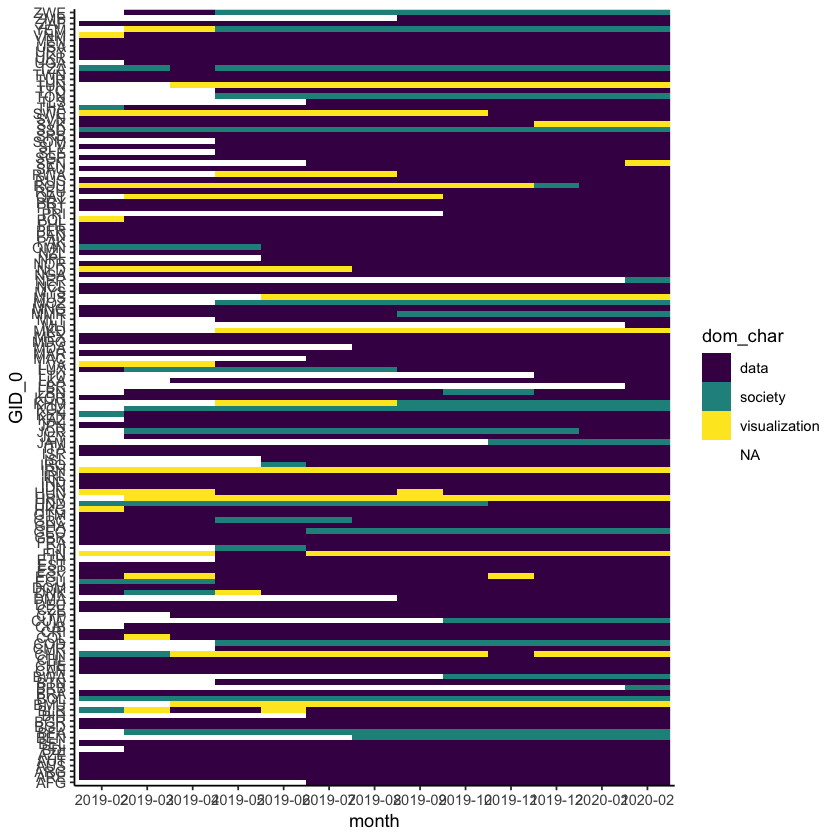

In [475]:
ggplot(res %>% filter(!is.na(GID_0)))+
    geom_raster(aes(x=GID_0, y = month, fill=dom_char))+
    scale_fill_viridis(discrete = T)+
    scale_colour_viridis(discrete = T, option = "viridis")+
    theme_classic()+
    coord_flip()

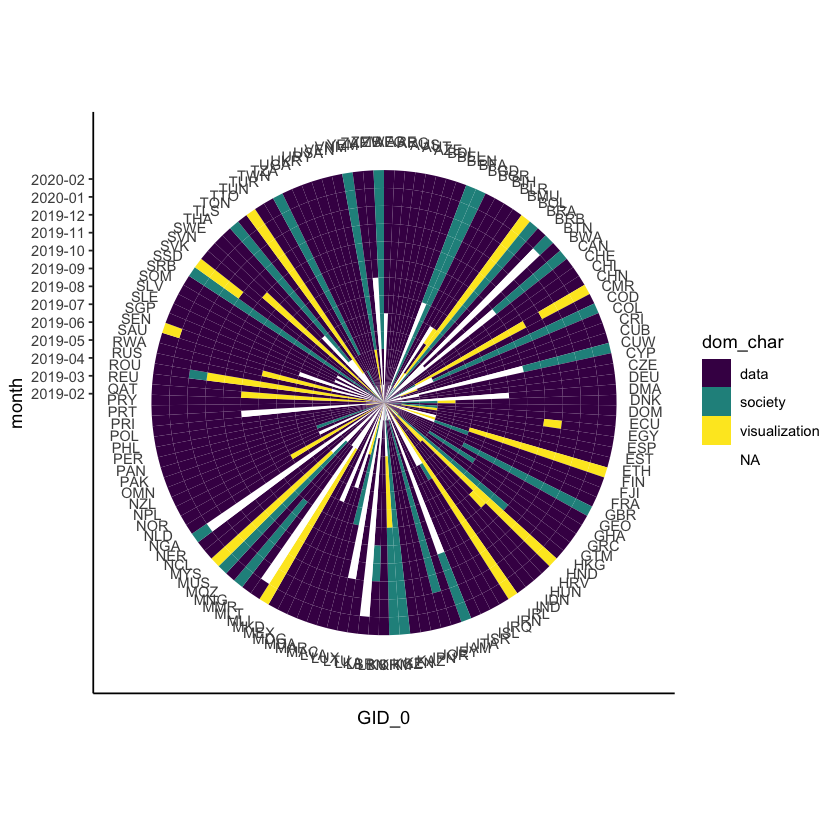

In [476]:
ggplot(res %>% filter(!is.na(GID_0)))+
    geom_tile(aes(x=GID_0, y = month, fill=dom_char))+
    scale_fill_viridis(discrete = T, na.value = 'white')+
    scale_colour_viridis(discrete = T, option = "viridis")+
    theme_classic()+
    coord_polar()


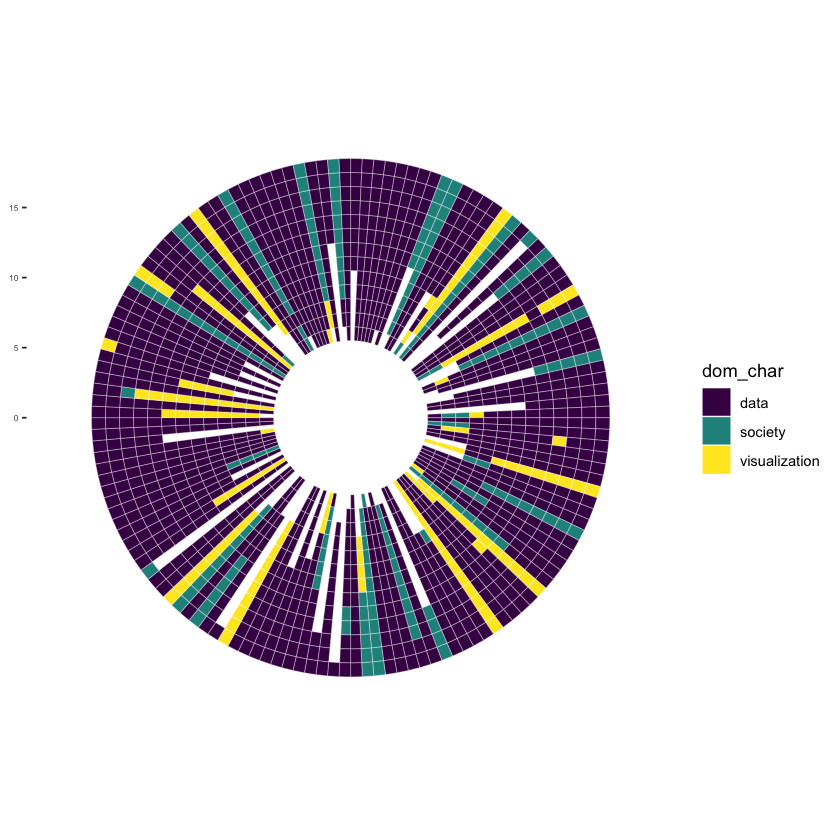

In [356]:
# Convert the factor levels to numeric + quanity to determine size of hole.
res$var2 = as.numeric(res$month) + 5

# Labels and breaks need to be added with scale_y_discrete.
y_labels = levels(res$month)
y_breaks = seq_along(y_labels) + 5

ggplot(res %>% filter(!is.na(GID_0)), aes(x=GID_0, y=var2, fill=dom_char)) +
     geom_tile(colour="white") +
     scale_fill_viridis(discrete = T)+
     ylim(c(0, max(res$var2) + 0.5)) +
     #scale_y_discrete(breaks=y_breaks, labels=y_labels ) +
     coord_polar() +
     theme(panel.background=element_blank(),
           axis.title=element_blank(),
           panel.grid=element_blank(),
           axis.text.x=element_blank(),
           #axis.ticks=element_blank(),
           axis.text.y=element_text(size=5))


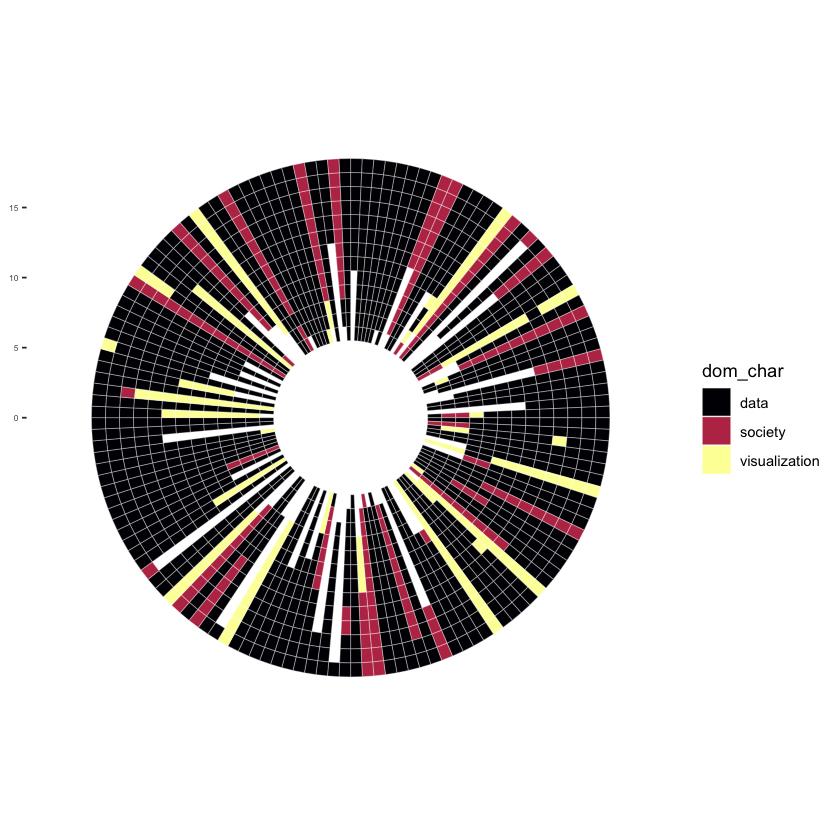

In [357]:
# Convert the factor levels to numeric + quanity to determine size of hole.
res$var2 = as.numeric(res$month) + 5

# Labels and breaks need to be added with scale_y_discrete.
y_labels = levels(res$month)
y_breaks = seq_along(y_labels) + 5

ggplot(res %>% filter(!is.na(GID_0)), aes(x=GID_0, y=var2, fill=dom_char)) +
     geom_tile(colour="white") +
     scale_fill_viridis(discrete = T, option = "B")+
     ylim(c(0, max(res$var2) + 0.5)) +
     #scale_y_discrete(breaks=y_breaks, labels=y_labels ) +
     coord_polar() +
     theme(panel.background=element_blank(),
           axis.title=element_blank(),
           panel.grid=element_blank(),
           axis.text.x=element_blank(),
           #axis.ticks=element_blank(),
           axis.text.y=element_text(size=5))


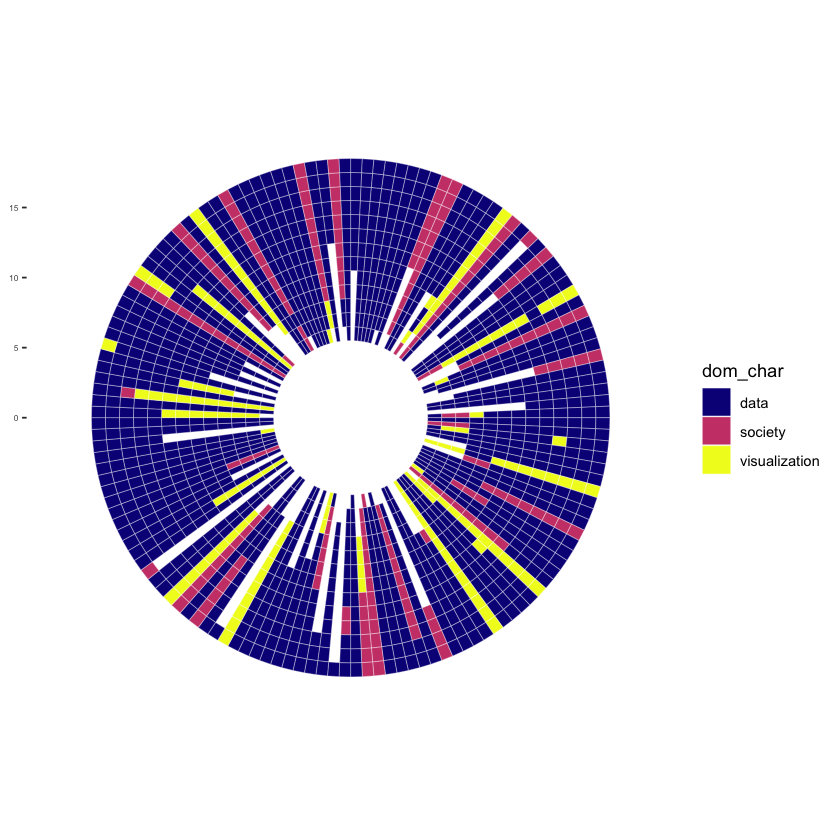

In [358]:
# Convert the factor levels to numeric + quanity to determine size of hole.
res$var2 = as.numeric(res$month) + 5

# Labels and breaks need to be added with scale_y_discrete.
y_labels = levels(res$month)
y_breaks = seq_along(y_labels) + 5

ggplot(res %>% filter(!is.na(GID_0)), aes(x=GID_0, y=var2, fill=dom_char)) +
     geom_tile(colour="white") +
     scale_fill_viridis(discrete = T, option = "C")+
     ylim(c(0, max(res$var2) + 0.5)) +
     #scale_y_discrete(breaks=y_breaks, labels=y_labels ) +
     coord_polar() +
     theme(panel.background=element_blank(),
           axis.title=element_blank(),
           panel.grid=element_blank(),
           axis.text.x=element_blank(),
           #axis.ticks=element_blank(),
           axis.text.y=element_text(size=5))

In [703]:
label_data <- country_perc %>% filter(!is.na(GID_0))
 
# calculate the ANGLE of the labels
number_of_bar <- nrow(label_data)
angle <-  90 - 360 * (as.numeric(label_data$GID_0)-0.5) /number_of_bar     # I substract 0.5 because the letter must have the angle of the center of the bars. Not extreme right(1) or extreme left (0)
 
# calculate the alignment of labels: right or left
# If I am on the left part of the plot, my labels have currently an angle < -90
label_data$hjust<-ifelse( angle < -90, 1, 0)
 
# flip angle BY to make them readable
label_data$angle<-ifelse(angle < -90, angle+180, angle)
label_data = label_data %>% 
select(-count, -data_perc, -vis_perc, -soc_perc)

Saving 7 x 7 in image


ERROR: Error in dyn.load(file, DLLpath = DLLpath, ...): unable to load shared object '/opt/anaconda3/envs/r-env/lib/R/library/gdtools/libs/gdtools.dylib':
  dlopen(/opt/anaconda3/envs/r-env/lib/R/library/gdtools/libs/gdtools.dylib, 6): Library not loaded: @rpath/libfreetype.6.dylib
  Referenced from: /opt/anaconda3/envs/r-env/lib/R/library/gdtools/libs/gdtools.dylib
  Reason: Incompatible library version: gdtools.dylib requires version 24.0.0 or later, but libfreetype.6.dylib provides version 23.0.0


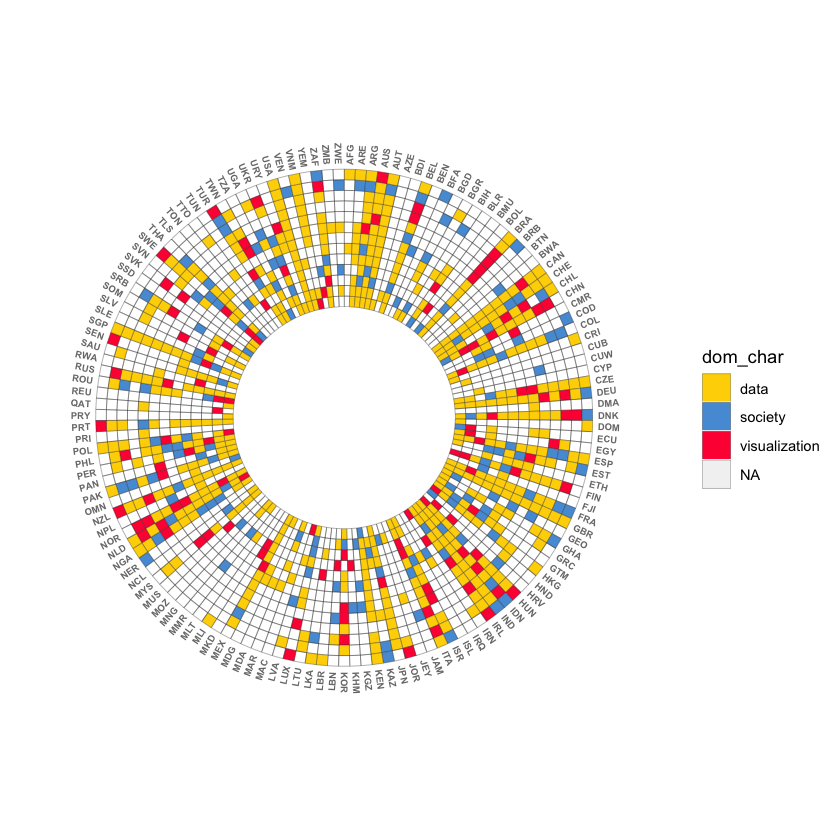

In [757]:
# Convert the factor levels to numeric + quanity to determine size of hole.
res$var2 = as.numeric(res$month) + 10
mar_value = 2
ax <- length(unique(res$GID_0))

ggplot(res %>% filter(GID_0!="NA"), aes(x=GID_0, y=var2, fill=dom_char)) +
     geom_tile(colour="#333333") +
     scale_fill_manual(values = c("#FFD400", "#579CD9", "#FF1C41"), na.value = 'transparent')+
# data: FF1C41; visualization: FFD400; society: 579CD9; outlines: 969696
     ylim(c(0, max(res$var2) + mar_value)) +
     #scale_y_discrete(breaks=y_breaks, labels=y_labels ) +
     coord_polar(start= 0 ) +
    geom_text(data=label_data, aes(x=GID_0, y=max(res$var2)+mar_value-1, label=GID_0, hjust=hjust), color="black", fontface="bold",alpha=0.6, size=2, angle= label_data$angle, inherit.aes = FALSE )+ 
 
     theme(panel.background = element_rect(fill = "transparent"),
                                           #, colour, size, linetype, color),
           axis.title=element_blank(),
           panel.grid=element_blank(),
           axis.text.x = element_blank(),
    
           axis.ticks=element_blank(),
           axis.text.y=element_blank())
ggsave("donut.svg")

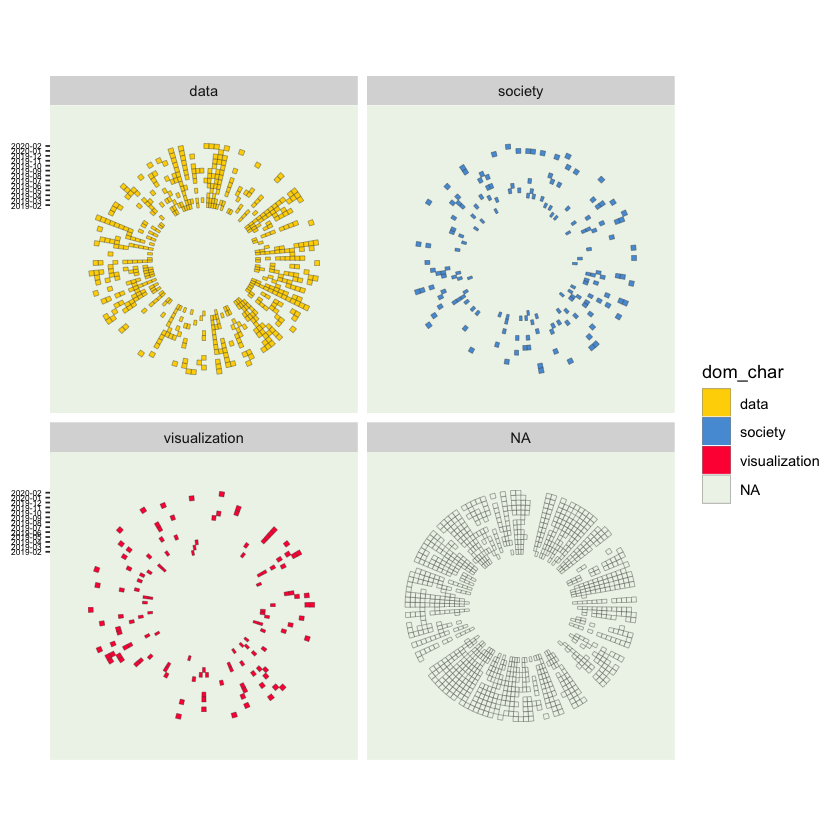

In [727]:
# Convert the factor levels to numeric + quanity to determine size of hole.
res$var2 = as.numeric(res$month) + 10
mar_value = 2
ax <- length(unique(res$GID_0))
# Labels and breaks need to be added with scale_y_discrete.
y_labels = levels(res$month)
y_breaks = seq_along(y_labels) + 10

ggplot(res %>% filter(GID_0!="NA"), aes(x=GID_0, y=var2, fill=dom_char)) +
     geom_tile(colour="#333333") +
     scale_fill_manual(values = c("#FFD400", "#579CD9", "#FF1C41"), na.value = '#EDF4E9')+
# data: FF1C41; visualization: FFD400; society: 579CD9; outlines: 969696
     #ylim(c(0, max(res$var2) + mar_value)) +
     scale_y_continuous(breaks=y_breaks, labels=y_labels, 
                        limits = c(0, max(res$var2) + mar_value)) +
     coord_polar(start= 0 ) +
    #geom_text(data=label_data, aes(x=GID_0, y=max(res$var2)+mar_value-1, label=GID_0, hjust=hjust), color="black", fontface="bold",alpha=0.6, size=2, angle= label_data$angle, inherit.aes = FALSE )+ 
 
     theme(panel.background = element_rect(fill = "#EDF4E9"),
           axis.title=element_blank(),
           #panel.grid.major = element_blank(),
           axis.text = element_blank(),
           panel.grid.minor = element_blank(),
           panel.grid.major = element_blank(),
           axis.text.y=element_text(size=5))+
facet_wrap(~dom_char)



In [728]:
head(res)

month_num month   GID_0 dom_char count data_perc vis_perc  soc_perc var2
1 1         2019-02 AFG   NA         2   100.00000  0.000000  0.00000 11  
2 1         2019-02 ARE   data      19    73.68421  5.263158 21.05263 11  
3 1         2019-02 ARG   data      65    53.84615 20.000000 26.15385 11  
4 1         2019-02 AUS   data     298    55.03356 24.496644 20.46980 11  
5 1         2019-02 AUT   data      45    51.11111 22.222222 26.66667 11  
6 1         2019-02 AZE   data       1   100.00000  0.000000  0.00000 11

Saving 7 x 7 in image


ERROR: Error in dyn.load(file, DLLpath = DLLpath, ...): unable to load shared object '/opt/anaconda3/envs/r-env/lib/R/library/gdtools/libs/gdtools.dylib':
  dlopen(/opt/anaconda3/envs/r-env/lib/R/library/gdtools/libs/gdtools.dylib, 6): Library not loaded: @rpath/libfreetype.6.dylib
  Referenced from: /opt/anaconda3/envs/r-env/lib/R/library/gdtools/libs/gdtools.dylib
  Reason: Incompatible library version: gdtools.dylib requires version 24.0.0 or later, but libfreetype.6.dylib provides version 23.0.0


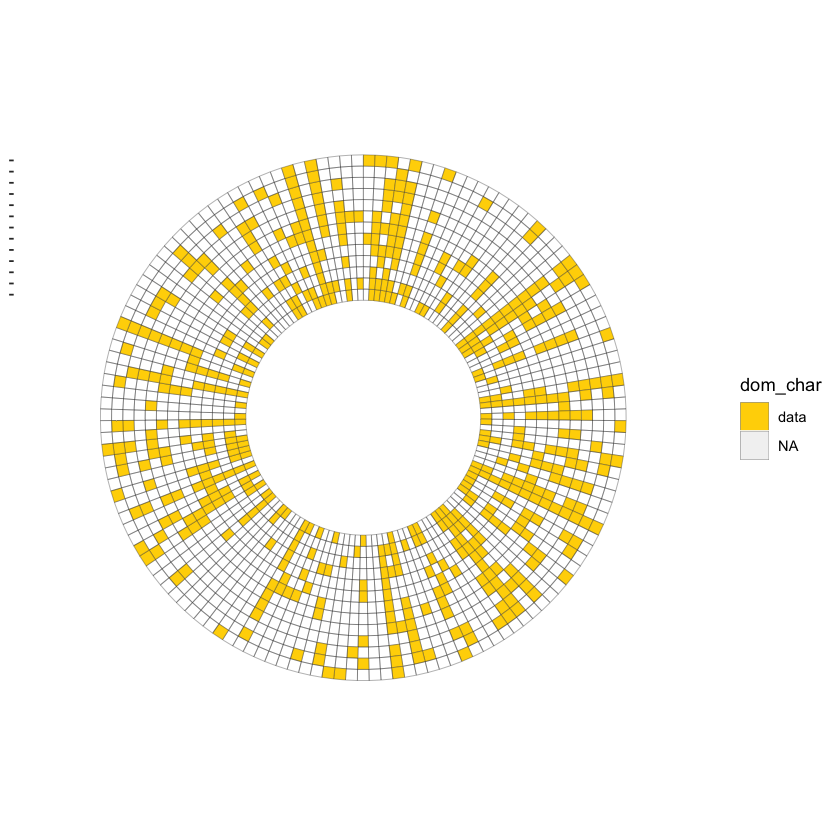

In [756]:
ggplot(res %>% 
       filter(GID_0!="NA") %>%
       mutate(dom_char = replace(dom_char,dom_char!="data",NA)), 
       aes(x=GID_0, y=var2, fill=dom_char)) +
     geom_tile(colour="#333333") +
     scale_fill_manual(values = c("#FFD400", "#579CD9", "#FF1C41"), na.value = 'transparent')+
# data: FF1C41; visualization: FFD400; society: 579CD9; outlines: 969696
     #ylim(c(0, max(res$var2) + mar_value)) +
     scale_y_continuous(breaks=y_breaks, labels=y_labels, 
                        limits = c(0, max(res$var2) + mar_value)) +
     coord_polar(start= 0 ) +
    #geom_text(data=label_data, aes(x=GID_0, y=max(res$var2)+mar_value-1, label=GID_0, hjust=hjust), color="black", fontface="bold",alpha=0.6, size=2, angle= label_data$angle, inherit.aes = FALSE )+ 
 
     theme(panel.background = element_blank(),#element_rect(fill = "#EDF4E9"),
           axis.title=element_blank(),
           #panel.grid.major = element_blank(),
           axis.text = element_blank(),
           panel.grid.minor = element_blank(),
           panel.grid.major = element_blank(),
           axis.text.y=element_blank())
ggsave("data.svg")

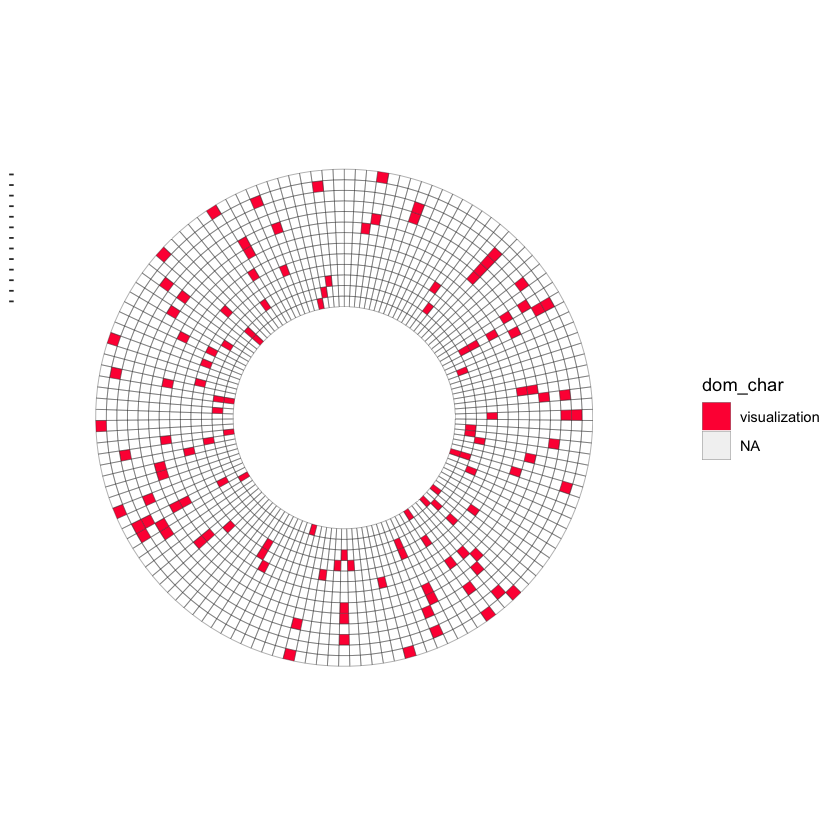

In [735]:
ggplot(res %>% 
       filter(GID_0!="NA") %>%
       mutate(dom_char = replace(dom_char,dom_char!="visualization",NA)), 
       aes(x=GID_0, y=var2, fill=dom_char)) +
     geom_tile(colour="#333333") +
     scale_fill_manual(values = c("#FF1C41"), na.value = 'transparent')+
# data: FF1C41; visualization: FFD400; society: 579CD9; outlines: 969696
     #ylim(c(0, max(res$var2) + mar_value)) +
     scale_y_continuous(breaks=y_breaks, labels=y_labels, 
                        limits = c(0, max(res$var2) + mar_value)) +
     coord_polar(start= 0 ) +
    #geom_text(data=label_data, aes(x=GID_0, y=max(res$var2)+mar_value-1, label=GID_0, hjust=hjust), color="black", fontface="bold",alpha=0.6, size=2, angle= label_data$angle, inherit.aes = FALSE )+ 
 
     theme(panel.background = element_blank(),#element_rect(fill = "#EDF4E9"),
           axis.title=element_blank(),
           #panel.grid.major = element_blank(),
           axis.text = element_blank(),
           panel.grid.minor = element_blank(),
           panel.grid.major = element_blank(),
           axis.text.y=element_blank())

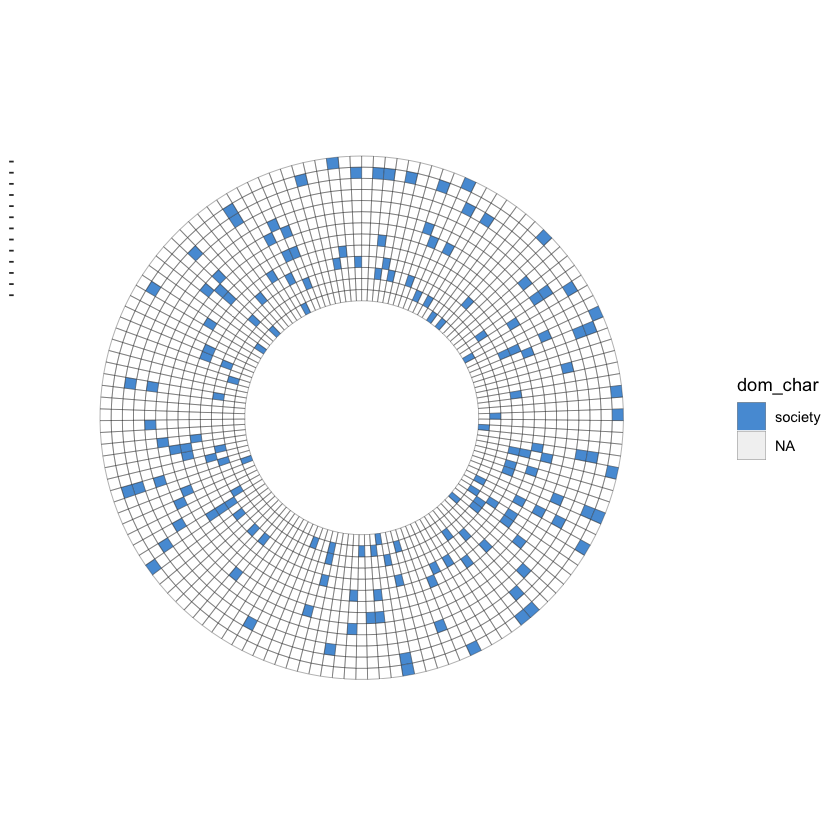

In [736]:
ggplot(res %>% 
       filter(GID_0!="NA") %>%
       mutate(dom_char = replace(dom_char,dom_char!="society",NA)), 
       aes(x=GID_0, y=var2, fill=dom_char)) +
     geom_tile(colour="#333333") +
     scale_fill_manual(values = c("#579CD9"), na.value = 'transparent')+
# data: FF1C41; visualization: FFD400; society: 579CD9; outlines: 969696
     #ylim(c(0, max(res$var2) + mar_value)) +
     scale_y_continuous(breaks=y_breaks, labels=y_labels, 
                        limits = c(0, max(res$var2) + mar_value)) +
     coord_polar(start= 0 ) +
    #geom_text(data=label_data, aes(x=GID_0, y=max(res$var2)+mar_value-1, label=GID_0, hjust=hjust), color="black", fontface="bold",alpha=0.6, size=2, angle= label_data$angle, inherit.aes = FALSE )+ 
 
     theme(panel.background = element_blank(),#element_rect(fill = "#EDF4E9"),
           axis.title=element_blank(),
           #panel.grid.major = element_blank(),
           axis.text = element_blank(),
           panel.grid.minor = element_blank(),
           panel.grid.major = element_blank(),
           axis.text.y=element_blank())

In [602]:
#full name in minusculas y crear seis espacios para la leyenda
label_data_na <- country_perc 

label_data_na= label_data_na %>%
            mutate(GID_0 = as.character(GID_0))%>%
            mutate(GID_0 = replace(GID_0,is.na(GID_0),"NA"))%>%
            mutate(GID_0 = as.factor(GID_0))

label_data_na$GID_0 = label_data_na$GID_0 %>%
                        fct_relevel( "NA", after = Inf)


# calculate the ANGLE of the labels
number_of_bar <- nrow(label_data_na)
angle <-  90 - 360 * (as.numeric(label_data_na$GID_0)-0.5) /number_of_bar     # I substract 0.5 because the letter must have the angle of the center of the bars. Not extreme right(1) or extreme left (0)
 
# calculate the alignment of labels: right or left
# If I am on the left part of the plot, my labels have currently an angle < -90
label_data_na$hjust<-ifelse( angle < -90, 1, 0)
 
# flip angle BY to make them readable
label_data_na$angle<-ifelse(angle < -90, angle+180, angle)
label_data_na = label_data_na %>% 
                select(-count, -data_perc, -vis_perc, -soc_perc) 

In [586]:
res_na = res %>% 
        mutate(GID_0 = as.character(GID_0))%>%
        mutate(GID_0 = replace(GID_0,is.na(GID_0),"NA"))%>%
        mutate(GID_0 = as.factor(GID_0)) %>%
        mutate(dom_char = replace(dom_char, GID_0=="NA",NA))
res_na$GID_0 = res_na$GID_0 %>%
                        fct_relevel( "NA", after = Inf)


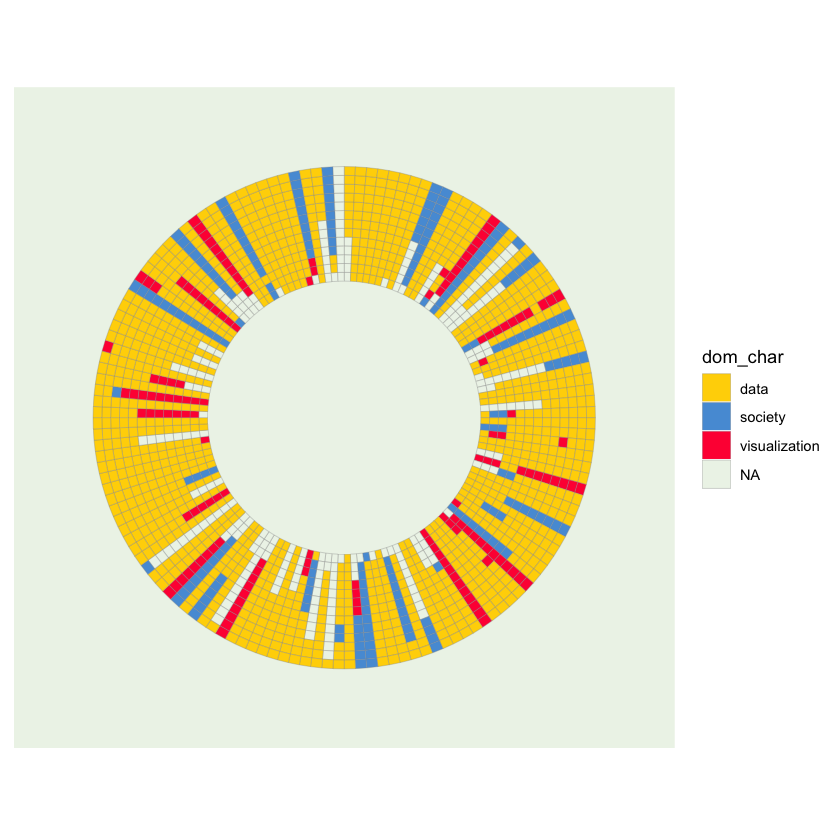

In [758]:
# Convert the factor levels to numeric + quanity to determine size of hole.
res_na$var2 = as.numeric(res_na$month) + 15
mar_value = 2
ax <- length(unique(res_na$GID_0))

ggplot(res_na , aes(x=GID_0, y=var2, fill=dom_char)) +
     geom_tile(colour="#969696") +
     scale_colour_manual(na.value ="#969696")+
     scale_fill_manual(values = c("#FFD400", "#579CD9", "#FF1C41"), na.value = '#EDF4E9')+
# data: FF1C41; visualization: FFD400; society: 579CD9; outlines: 969696
     ylim(c(0, max(res_na$var2) + mar_value)) +
     #scale_y_discrete(breaks=y_breaks, labels=y_labels ) +
     coord_polar(start= 0 ) +
    #geom_text(data=label_data_na, aes(x=GID_0, y=max(res_na$var2)+mar_value-1, label=GID_0, hjust=hjust), 
              #color="black", fontface="bold",alpha=0.6, size=2, angle= label_data_na$angle, inherit.aes = FALSE )+ 
 
     theme(panel.background = element_rect(fill = "#EDF4E9"),
                                           #, colour, size, linetype, color),
           axis.title=element_blank(),
           panel.grid=element_blank(),
           axis.text = element_blank(),
           axis.ticks=element_blank())

In [741]:
top50 = country_perc %>% 
    arrange(desc(count))%>% slice(1:50)
bot50 = country_perc %>% 
    arrange(count)%>% slice(1:50)
top10 = country_perc %>% 
filter(!is.na(GID_0))%>% 
    arrange(desc(count))%>% slice(1:11)
top4 = country_perc %>% 
    arrange(desc(count))%>% slice(1:4)

In [742]:
top10

GID_0 count data_perc vis_perc soc_perc
1  USA   5312  47.70331  27.18373 25.11295
2  GBR   1123  49.15405  28.67320 22.17275
3  CAN    546  46.15385  30.21978 23.62637
4  IND    477  49.89518  24.73795 25.36688
5  AUS    298  55.03356  24.49664 20.46980
6  DEU    260  50.76923  27.30769 21.92308
7  BRA    230  52.17391  27.82609 20.00000
8  ESP    211  49.28910  28.43602 22.27488
9  FRA    201  52.73632  30.34826 16.91542
10 NLD    166  43.37349  39.15663 17.46988
11 MEX    129  47.28682  24.03101 28.68217

In [685]:
d_dat = d %>%
        select(-lat, -long) %>%
        gather("character","score", data:society) %>% 
        group_by(X) %>% 
        slice(which.max(score)) %>%
        select(X,GID_0, month, week, date, character)

In [745]:
head(d_dat)

X GID_0 month   week date       character
1 1 USA   2019-02 8    2019-02-20 society  
2 2 USA   2019-02 8    2019-02-20 society  
3 3 USA   2019-02 8    2019-02-20 data     
4 4 IND   2019-02 8    2019-02-20 data     
5 5 CAN   2019-02 8    2019-02-20 data     
6 6 USA   2019-02 8    2019-02-20 data

# Ordenar por número total de personas, quitar NA

In [752]:
d_top_countries = d_dat %>% 
                filter(GID_0%in%top10$GID_0) 
d_top_countries$GID_0 = d_top_countries$GID_0 %>% 
                        fct_infreq
#summary(d_top_countries$GID_0)

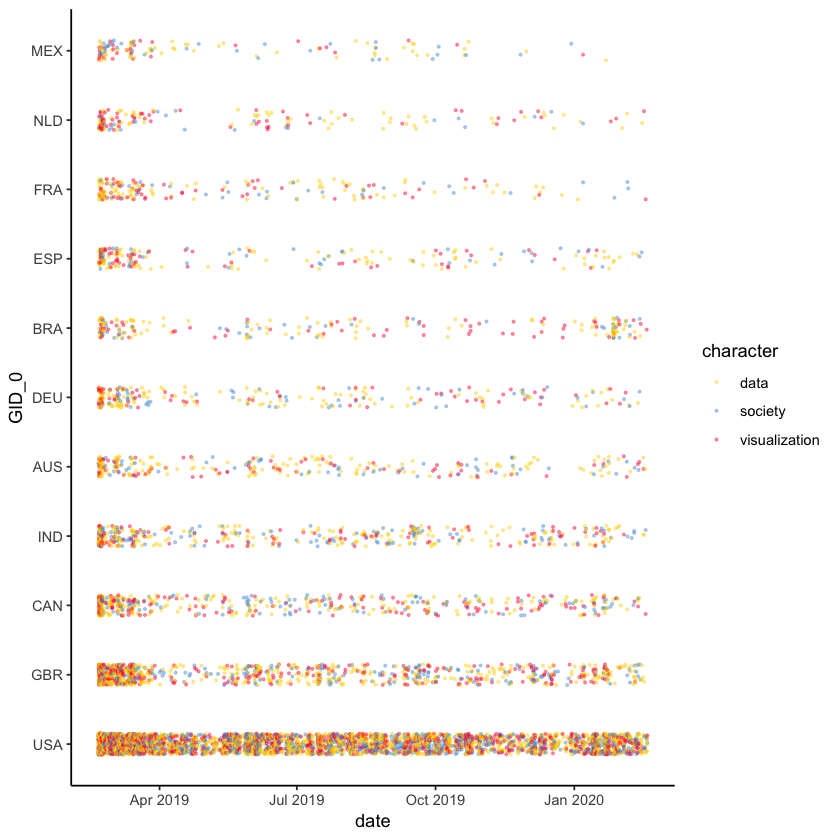

In [755]:
ggplot(d_top_countries)+
    geom_jitter(aes(x=GID_0, y = date, fill=character, colour=character), alpha = 0.4, shape = 21, size=0.5, width = 0.15)+
    scale_fill_manual(values = c("#FFD400", "#579CD9", "#FF1C41"))+
    scale_colour_manual(values = c("#FFD400", "#579CD9", "#FF1C41"))+
    theme_classic()+
    coord_flip()

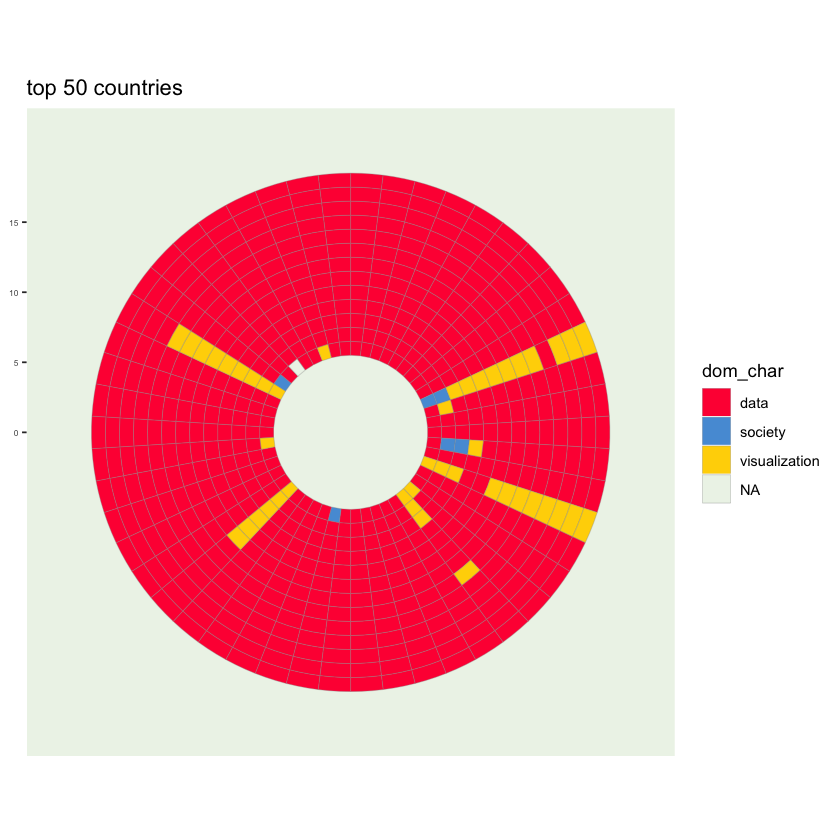

In [488]:
# Convert the factor levels to numeric + quanity to determine size of hole.
res$var2 = as.numeric(res$month) + 5

# Labels and breaks need to be added with scale_y_discrete.
y_labels = levels(res$month)
y_breaks = seq_along(y_labels) + 5




ggplot(res %>% filter(GID_0%in%top50$GID_0), aes(x=GID_0, y=var2, fill=dom_char)) +
     geom_tile(colour="#969696") +
     scale_fill_manual(values = c("#FF1C41","#579CD9", "#FFD400"), na.value = '#EDF4E9')+
# data: FF1C41; visualization: FFD400; society: 579CD9; outlines: 969696
     ylim(c(0, max(res$var2) + 0.5)) +
     #scale_y_discrete(breaks=y_breaks, labels=y_labels ) +
     coord_polar() +
     theme(panel.background = element_rect(fill = "#EDF4E9"),                                          
           axis.title=element_blank(),
           panel.grid=element_blank(),
           axis.text.x=element_blank(),
           #axis.ticks=element_blank(),
           axis.text.y=element_text(size=5))+
    ggtitle( "top 50 countries")

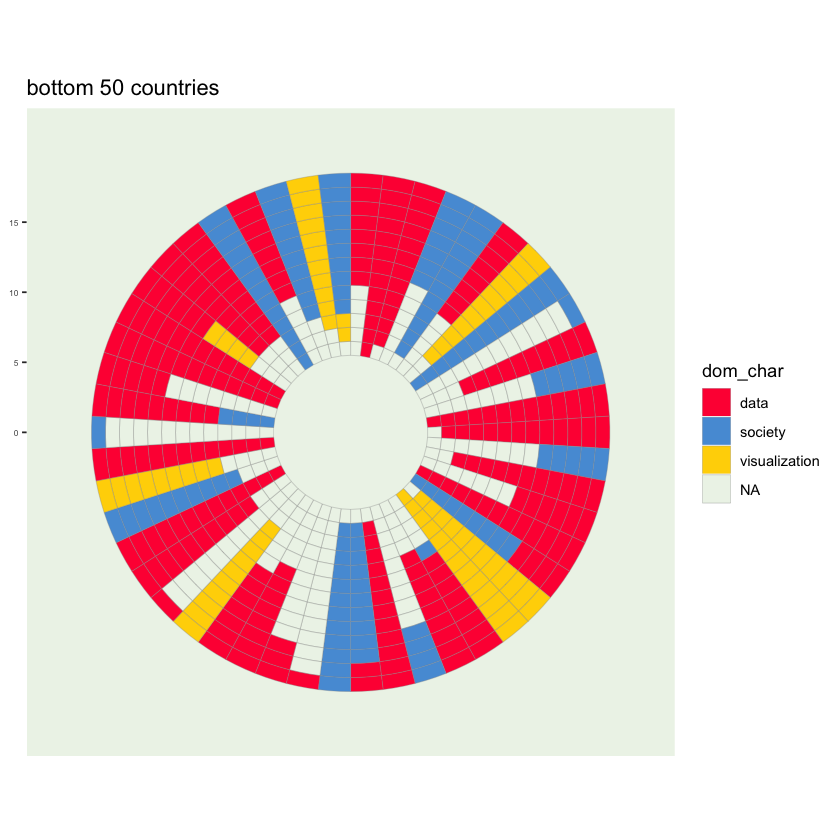

In [491]:
# Convert the factor levels to numeric + quanity to determine size of hole.
res$var2 = as.numeric(res$month) + 5

# Labels and breaks need to be added with scale_y_discrete.
y_labels = levels(res$month)
y_breaks = seq_along(y_labels) + 5




ggplot(res %>% filter(GID_0%in%bot50$GID_0), aes(x=GID_0, y=var2, fill=dom_char)) +
     geom_tile(colour="#969696") +
     scale_fill_manual(values = c("#FF1C41","#579CD9", "#FFD400"), na.value = '#EDF4E9')+
# data: FF1C41; visualization: FFD400; society: 579CD9; outlines: 969696
     ylim(c(0, max(res$var2) + 0.5)) +
     #scale_y_discrete(breaks=y_breaks, labels=y_labels ) +
     coord_polar() +
     theme(panel.background = element_rect(fill = "#EDF4E9"),                                          
           axis.title=element_blank(),
           panel.grid=element_blank(),
           axis.text.x=element_blank(),
           #axis.ticks=element_blank(),
           axis.text.y=element_text(size=5))+
    ggtitle( "bottom 50 countries")

In [478]:
head(res)

month_num month   GID_0 dom_char count data_perc vis_perc  soc_perc var2
1 1         2019-02 AFG   NA         2   100.00000  0.000000  0.00000 6   
2 1         2019-02 ARE   data      19    73.68421  5.263158 21.05263 6   
3 1         2019-02 ARG   data      65    53.84615 20.000000 26.15385 6   
4 1         2019-02 AUS   data     298    55.03356 24.496644 20.46980 6   
5 1         2019-02 AUT   data      45    51.11111 22.222222 26.66667 6   
6 1         2019-02 AZE   data       1   100.00000  0.000000  0.00000 6

# X meses la Y son semanas para un único país el color es caracter predominante de la semana. tiles polar
USA, CAN, GRB, IND

In [759]:
d_top4_countries = d_dat %>% 
                filter(GID_0%in%top4$GID_0) 

In [763]:
head(d_top4_countries)

X GID_0 month   week date       character var2
1 1 USA   2019-02 8    2019-02-20 society   23  
2 2 USA   2019-02 8    2019-02-20 society   23  
3 3 USA   2019-02 8    2019-02-20 data      23  
4 4 IND   2019-02 8    2019-02-20 data      23  
5 5 CAN   2019-02 8    2019-02-20 data      23  
6 6 USA   2019-02 8    2019-02-20 data      23

In [780]:
nth_week<- function(dates = NULL,
                    count_weeks_in = c("month","year"),
                    begin_week_on = "Monday"){

  require(lubridate)

  count_weeks_in<- tolower(count_weeks_in[1])

  # day_names and day_index are for beginning the week on a day other than Sunday
  # (this vector ordering matters, so careful about changing it)
  day_names<- c("Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday")

  # index integer of first match
  day_index<- pmatch(tolower(begin_week_on),
                     tolower(day_names))[1]


  ### Calculate week index of each day

  if (!is.na(pmatch(count_weeks_in, "year"))) {

    # For year:
    # sum the day of year, index for day of week at start of year, and constant 5 
    #  then integer divide quantity by 7   
    # (explicit on package so lubridate and data.table don't fight)
    n_week<- (5 + 
                lubridate::yday(dates) + 
                lubridate::wday(floor_date(dates, 'year'), 
                                week_start = day_index)
    ) %/% 7

  } else {

    # For month:
    # same algorithm as above, but for month rather than year
    n_week<- (5 + 
                lubridate::day(dates) + 
                lubridate::wday(floor_date(dates, 'month'), 
                                week_start = day_index)
    ) %/% 7

  }

  # naming very helpful for review
  names(n_week)<- paste0(lubridate::wday(dates,T), '-', dates)

  n_week

}

In [783]:
d_top4_countries=
d_top4_countries %>%
mutate(week_c = (nth_week(date, "month")))

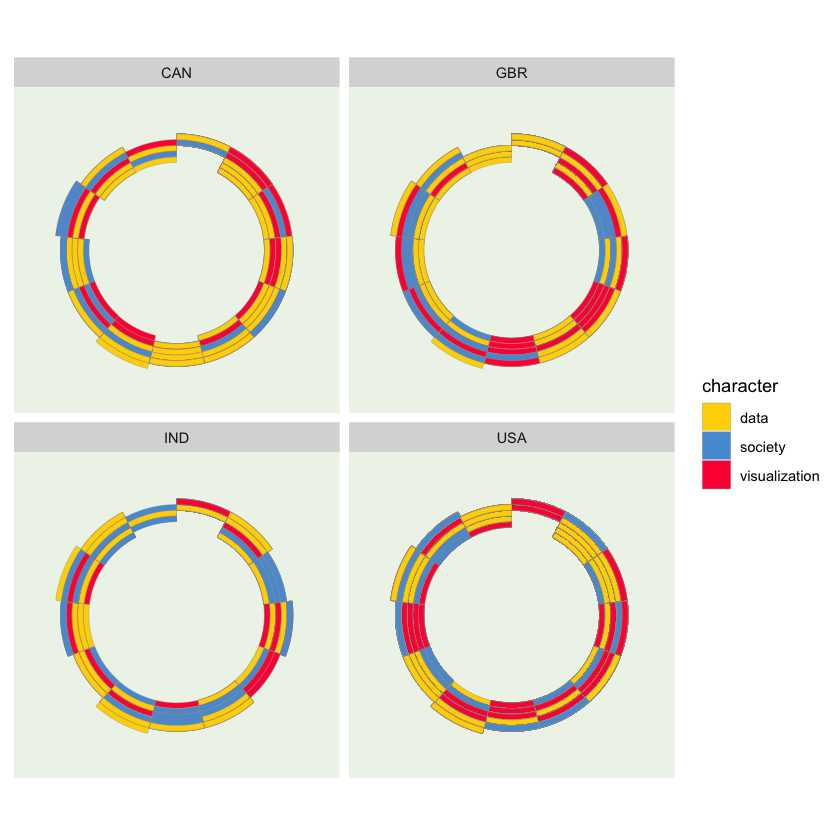

In [788]:
# Convert the factor levels to numeric + quanity to determine size of hole.
d_top4_countries$var2 = as.numeric(d_top4_countries$week_c) + 15
mar_value = 2
ax <- length(unique(d_top4_countries$month))

ggplot(d_top4_countries , aes(x=month, y=var2, fill=character)) +
     geom_tile(colour="#969696") +

     scale_colour_manual(na.value ="#969696")+
     scale_fill_manual(values = c("#FFD400", "#579CD9", "#FF1C41"), na.value = '#EDF4E9')+
# data: FF1C41; visualization: FFD400; society: 579CD9; outlines: 969696
     ylim(c(0, max(d_top4_countries$var2) + mar_value)) +
     #scale_y_discrete(breaks=y_breaks, labels=y_labels ) +
     coord_polar(start= 0 ) +
    #geom_text(data=label_data_na, aes(x=GID_0, y=max(res_na$var2)+mar_value-1, label=GID_0, hjust=hjust), 
              #color="black", fontface="bold",alpha=0.6, size=2, angle= label_data_na$angle, inherit.aes = FALSE )+ 
 
     theme(panel.background = element_rect(fill = "#EDF4E9"),
                                           #, colour, size, linetype, color),
           axis.title=element_blank(),
           panel.grid=element_blank(),
           axis.text = element_blank(),
           axis.ticks=element_blank())+
facet_wrap(~GID_0)

# X meses la Y de semanas, facet de character y percentage de alpha
Sin diferenciar paises

# For each month get the percent of people in each of the three character

In [793]:
head(d_char)

X GID_0 month   week character date       year
1 1 USA   2019-02 8    society   2019-02-20 2019
2 2 USA   2019-02 8    society   2019-02-20 2019
3 3 USA   2019-02 8    data      2019-02-20 2019
4 4 IND   2019-02 8    data      2019-02-20 2019
5 5 CAN   2019-02 8    data      2019-02-20 2019
6 6 USA   2019-02 8    data      2019-02-20 2019

In [792]:
d_char = d_char %>%
mutate(year = year(date))

In [406]:
d_char$month = as.factor(d_char$month)

In [413]:
d_char$month %>% as.numeric %>% tail

[1] 13 13 13 13 13 13

In [798]:
plot_data = d_char %>%
        select(-GID_0, -week) %>%   
        mutate(month = month(date)) %>%
        group_by(month, year) %>% 
        count(month, character) %>%
        #group_by(month)%>%
        mutate(percent = n/sum(n)) %>% 
        mutate(percent = ifelse(is.nan(percent), 0, percent)) %>%
        mutate(month_num = as.numeric(month))

In [805]:
plot_data = plot_data %>%
complete(nesting(year, character), month = 1:12, fill = list(n = 0)) %>%
mutate(percent = ifelse(is.na(percent), 0, percent))

In [806]:
plot_data %>% head

year character month n   percent   month_num
1 2020 data      1     396 0.5063939  1       
2 2020 data      2     133 0.4523810  2       
3 2020 data      3       0 0.0000000 NA       
4 2020 data      4       0 0.0000000 NA       
5 2020 data      5       0 0.0000000 NA       
6 2020 data      6       0 0.0000000 NA

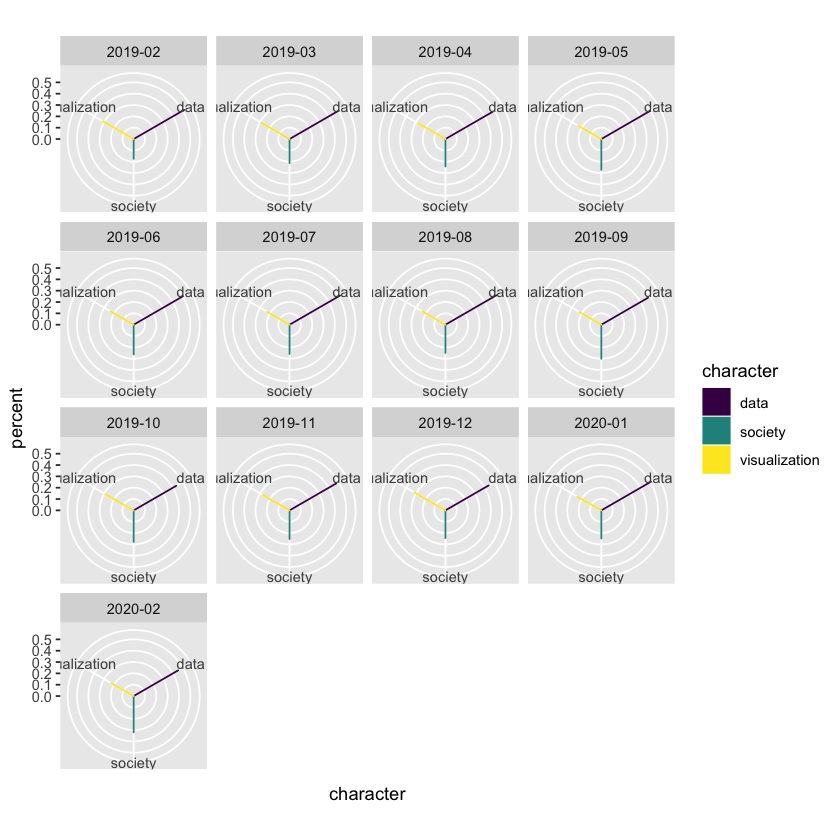

In [447]:
ggplot(plot_data, aes(x = character, y = percent, color = character, fill = character))+
        geom_area()+
        scale_color_viridis(discrete = T, option = "D")+
        scale_fill_viridis(discrete = T, option = "D")+
        coord_polar()+
        facet_wrap(~month)
        

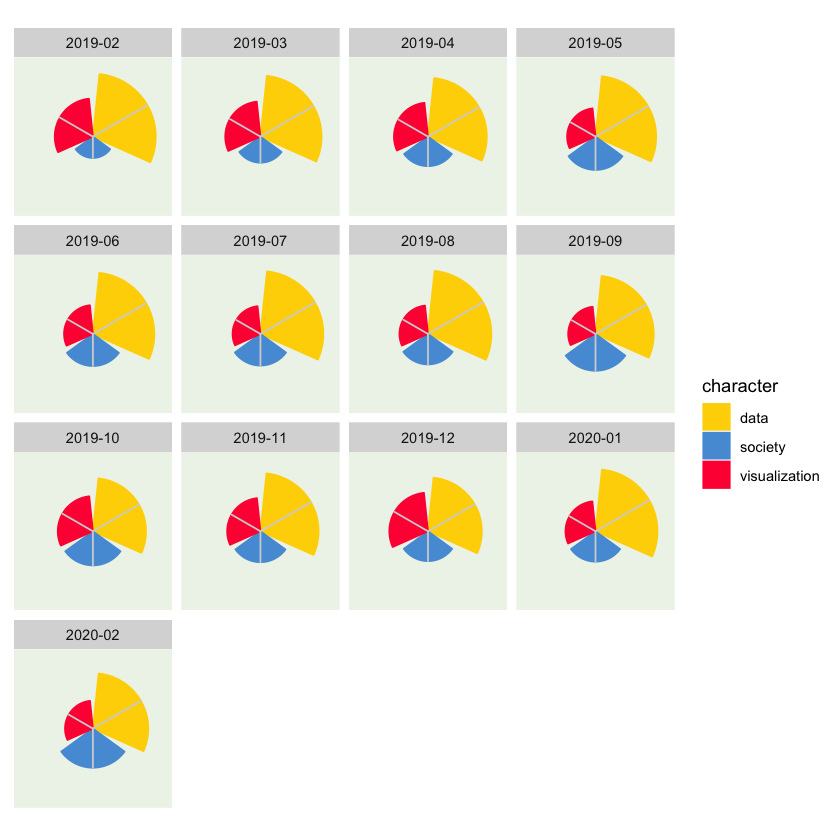

In [669]:
ggplot(plot_data)+
        geom_col(aes(x = character, y = percent, colour = character, fill = character))+
        geom_area(aes(x = character, y = percent), colour="lightgray")+
        scale_colour_manual(values = c("#FFD400", "#579CD9", "#FF1C41"), na.value = '#EDF4E9')+
        scale_fill_manual(values = c("#FFD400", "#579CD9", "#FF1C41"), na.value = '#EDF4E9')+
        coord_polar()+
        facet_wrap(~month)+
        theme(panel.background = element_rect(fill = "#EDF4E9"),
                                           #, colour, size, linetype, color),
           axis.title=element_blank(),
           panel.grid=element_blank(),
           axis.text = element_blank(),
           axis.ticks=element_blank())

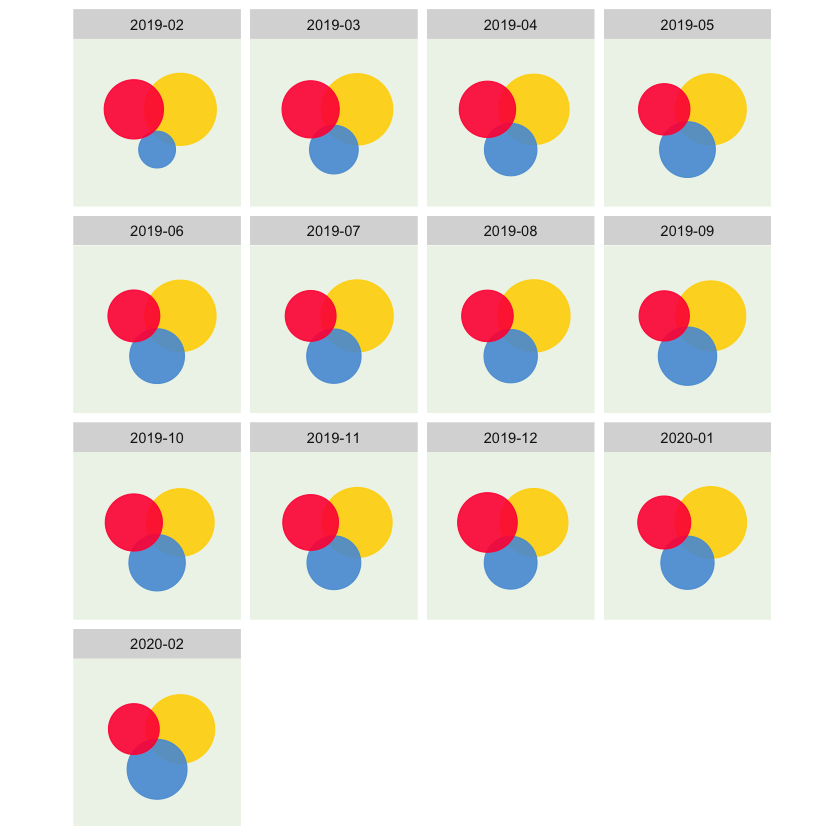

In [671]:
ggplot(plot_data)+
        geom_point(aes(x = character, size = percent, colour = character, fill = character), y=4, alpha=0.9)+
        #geom_area(aes(x = character, y = percent), colour="lightgray")+
        scale_colour_manual(values = c("#FFD400", "#579CD9", "#FF1C41"), na.value = '#EDF4E9')+
        scale_fill_manual(values = c("#FFD400", "#579CD9", "#FF1C41"), na.value = '#EDF4E9')+
        scale_size(range = c(10, 20))+
        ylim(c(0, 10))+
        coord_polar()+
        facet_wrap(~month)+
        theme(panel.background = element_rect(fill = "#EDF4E9"),
                                           #, colour, size, linetype, color),
           axis.title=element_blank(),
           panel.grid=element_blank(),
           axis.text = element_blank(),
           axis.ticks=element_blank(),
             legend.position = "none")

In [ ]:
ggplot(plot_data)+
        geom_col(aes(x = character, y = percent, colour = character, fill = character))+
        geom_area(colour="lightgray")+
        scale_colour_manual(values = c("#FFD400", "#579CD9", "#FF1C41"), na.value = '#EDF4E9')+
        scale_fill_manual(values = c("#FFD400", "#579CD9", "#FF1C41"), na.value = '#EDF4E9')+
        #coord_polar()+
        facet_wrap(~month)+
        theme(panel.background = element_rect(fill = "#EDF4E9"),
                                           #, colour, size, linetype, color),
           axis.title=element_blank(),
           panel.grid=element_blank(),
           axis.text = element_blank(),
           axis.ticks=element_blank())

In [819]:
head(plot_data)

year character month n   percent   month_num
1 2020 data      1     396 0.5063939  1       
2 2020 data      2     133 0.4523810  2       
3 2020 data      3       0 0.0000000 NA       
4 2020 data      4       0 0.0000000 NA       
5 2020 data      5       0 0.0000000 NA       
6 2020 data      6       0 0.0000000 NA

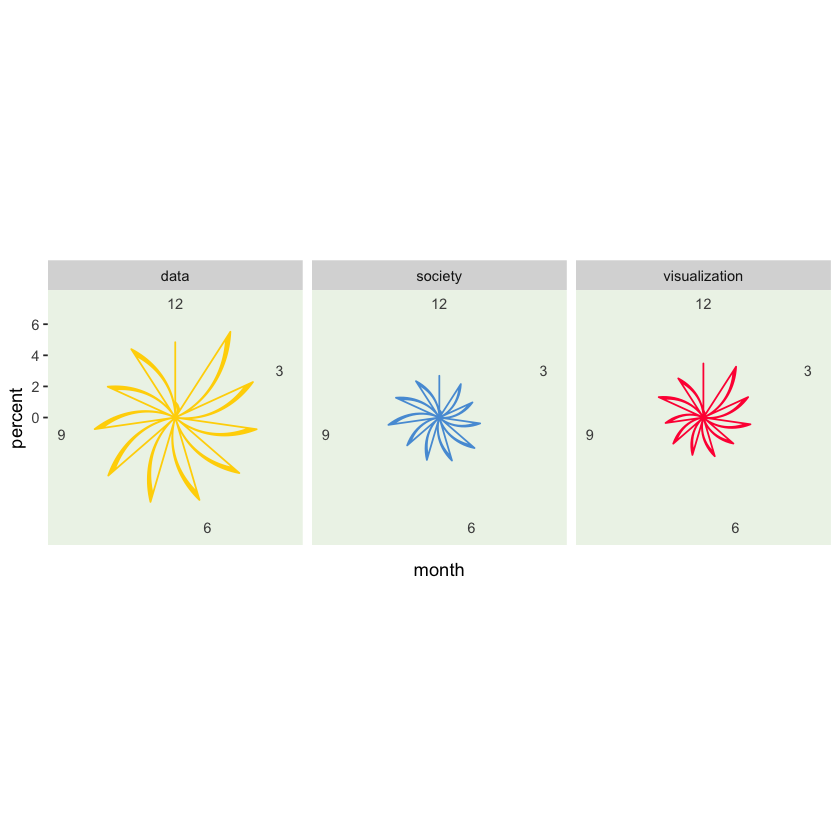

In [859]:
ggplot(plot_data, aes(x = month, y = percent, fill = character, colour=character)) +
  geom_area(size = 0.5) +
scale_colour_manual(values = c("#FFD400", "#579CD9", "#FF1C41"), na.value = '#EDF4E9')+
        scale_fill_manual(values = c("#FFD400", "#579CD9", "#FF1C41"), na.value = '#EDF4E9')+
    #scale_x_continuous(labels = month.abb, breaks = 1:12)+    
  #geom_path(aes(color = character), size = 1, show.legend = TRUE) +
  coord_polar(theta = "x", start = 0) +
  
facet_wrap(~character, drop = TRUE)+
        theme(panel.background = element_rect(fill = "#EDF4E9"),
                                           #, colour, size, linetype, color),
           #axis.title=element_blank(),
           panel.grid=element_blank(),
           #axis.text = element_blank(),
           #axis.ticks=element_blank(),
             legend.position = "none")

# create complete years 2018 and 2020 with 0 as value, then group by year

In [789]:
head(plot_data)

month   character     n    percent   month_num
1 2019-02 data          1290 0.5137395 1        
2 2019-02 society        438 0.1744325 1        
3 2019-02 visualization  783 0.3118280 1        
4 2019-03 data          1144 0.4993453 2        
5 2019-03 society        488 0.2130074 2        
6 2019-03 visualization  659 0.2876473 2

In [672]:
ggplot() +
  geom_ellipse(aes(x0 = 0, y0 = 0, a = 6, b = 3, angle = -pi / 3, m1 = 3)) +
  coord_fixed()

ERROR: Error in geom_ellipse(aes(x0 = 0, y0 = 0, a = 6, b = 3, angle = -pi/3, : could not find function "geom_ellipse"


``` {r}
library(plyr)
library(dplyr)
library(reshape2)
library(tidyr)
library(forcats)
library(extrafont)
library(lubridate)

font_import()

d = read.csv("/Users/gretacvega/Documents/GitHub/dvs/d_gadm.csv")
d$date = as.Date(d$date, ,format="%Y-%m-%d")
d = d %>% mutate(month = paste0(year(date), "-", ifelse(month(date)>9, month(date),paste0("0",month(date)))))


country_count = 
  d %>%
  group_by(GID_0) %>%
  summarize(count=length(GID_0))

country_count_month = 
  d %>%
  group_by(GID_0, month) %>%
  summarize(count=length(GID_0))

d_char = d %>%
  select(-lat, -long) %>%
  gather("character","score", data:society) %>% 
  group_by(X) %>% 
  slice(which.max(score)) %>%
  select(X,GID_0, month, week, character, date)
d_all = d_char %>%
  select(X, character) %>%
  inner_join(d, by = "X")

country_perc = d_all %>%
  group_by(GID_0) %>%
  summarize(data_char=sum(character == "data"),
            vis_char = sum(character == "visualization"),
            soc_char = sum(character == "society"),
            count = length(GID_0))%>%
  mutate(data_perc = (data_char/count)*100, vis_perc = (vis_char/count)*100, soc_perc = (soc_char/count)*100)%>%
  select(GID_0, count, data_perc, vis_perc, soc_perc)

country_perc_month = d_all %>%
  group_by(GID_0, month) %>%
  summarize(data_char=sum(character == "data"),
            vis_char = sum(character == "visualization"),
            soc_char = sum(character == "society"),
            count = length(GID_0))%>%
  mutate(data_perc = (data_char/count)*100, vis_perc = (vis_char/count)*100, soc_perc = (soc_char/count)*100)%>%
  select(GID_0, month, count, data_perc, vis_perc, soc_perc)

d_all$character = as.factor(d_all$character)

dd = d_all %>% 
  select(-lat,-long, -data, -visualization, -society, -date, -week) 
months = unique(dd$month)

getmode <- function(x) {names(which.max(table(x)))
}


res_list = list()
for (m in 1:length(months)){
  mm = months[m]
  d2 = dd %>%
    filter(month %in% mm) %>%
    group_by(GID_0) %>%
    summarize(dom_char= getmode(character))
  res_list[[m]]=d2
  names(res_list)[m] = months[m]
}

res = ldply(res_list, .id = "month")
res$dom_char = as.factor(res$dom_char)

res=
  res%>%
  mutate(month_num = as.numeric(month))%>%
  complete(nesting(month_num, month), GID_0)%>%
  inner_join(country_perc, by = "GID_0") 

label_data <- country_perc %>% filter(!is.na(GID_0))

# calculate the ANGLE of the labels
number_of_bar <- nrow(label_data)
angle <-  90 - 360 * (as.numeric(label_data$GID_0)-0.5) /number_of_bar     # I substract 0.5 because the letter must have the angle of the center of the bars. Not extreme right(1) or extreme left (0)

# calculate the alignment of labels: right or left
# If I am on the left part of the plot, my labels have currently an angle < -90
label_data$hjust<-ifelse( angle < -90, 1, 0)

# flip angle BY to make them readable
label_data$angle<-ifelse(angle < -90, angle+180, angle)
label_data = label_data %>% 
  select(-count, -data_perc, -vis_perc, -soc_perc)

# Convert the factor levels to numeric + quanity to determine size of hole.
res$var2 = as.numeric(res$month) + 10
mar_value = 2
ax <- length(unique(res$GID_0))

ggplot(res %>% filter(GID_0!="NA"), aes(x=GID_0, y=var2, fill=dom_char)) +
  geom_tile(colour="#333333") +
  scale_fill_manual(values = c("#FFD400", "#579CD9", "#FF1C41"), na.value = 'transparent')+
  # data: FF1C41; visualization: FFD400; society: 579CD9; outlines: 969696
  ylim(c(0, max(res$var2) + mar_value)) +
  #scale_y_discrete(breaks=y_breaks, labels=y_labels ) +
  coord_polar(start= 0 ) +
  geom_text(data=label_data, aes(x=GID_0, y=max(res$var2)+mar_value-1, label=GID_0, hjust=hjust), color="black", fontface="bold",alpha=0.6, size=2, angle= label_data$angle, inherit.aes = FALSE )+ 
  
  theme(panel.background = element_rect(fill = "transparent"),
        #, colour, size, linetype, color),
        axis.title=element_blank(),
        panel.grid=element_blank(),
        axis.text.x = element_blank(),
        
        axis.ticks=element_blank(),
        axis.text.y=element_blank())
ggsave("/Users/gretacvega/Documents/GitHub/dvs/donut.svg")

ggplot(res %>% 
         filter(GID_0!="NA") %>%
         mutate(dom_char = replace(dom_char,dom_char!="data",NA)), 
       aes(x=GID_0, y=var2, fill=dom_char)) +
  geom_tile(colour="#333333") +
  scale_fill_manual(values = c("#FFD400", "#579CD9", "#FF1C41"), na.value = 'transparent')+
  # data: FF1C41; visualization: FFD400; society: 579CD9; outlines: 969696
  #ylim(c(0, max(res$var2) + mar_value)) +
  scale_y_continuous(limits = c(0, max(res$var2) + mar_value)) +
  coord_polar(start= 0 ) +
  #geom_text(data=label_data, aes(x=GID_0, y=max(res$var2)+mar_value-1, label=GID_0, hjust=hjust), color="black", fontface="bold",alpha=0.6, size=2, angle= label_data$angle, inherit.aes = FALSE )+ 
  
  theme(panel.background = element_blank(),#element_rect(fill = "#EDF4E9"),
        axis.title=element_blank(),
        #panel.grid.major = element_blank(),
        axis.text = element_blank(),
        panel.grid.minor = element_blank(),
        panel.grid.major = element_blank(),
        axis.text.y=element_blank())
ggsave("/Users/gretacvega/Documents/GitHub/dvs/data.svg")


ggplot(res %>% 
         filter(GID_0!="NA") %>%
         mutate(dom_char = replace(dom_char,dom_char!="visualization",NA)), 
       aes(x=GID_0, y=var2, fill=dom_char)) +
  geom_tile(colour="#333333") +
  scale_fill_manual(values = c("#FF1C41"), na.value = 'transparent')+
  # data: FF1C41; visualization: FFD400; society: 579CD9; outlines: 969696
  #ylim(c(0, max(res$var2) + mar_value)) +
  scale_y_continuous(limits = c(0, max(res$var2) + mar_value)) +
  coord_polar(start= 0 ) +
  #geom_text(data=label_data, aes(x=GID_0, y=max(res$var2)+mar_value-1, label=GID_0, hjust=hjust), color="black", fontface="bold",alpha=0.6, size=2, angle= label_data$angle, inherit.aes = FALSE )+ 
  
  theme(panel.background = element_blank(),#element_rect(fill = "#EDF4E9"),
        axis.title=element_blank(),
        #panel.grid.major = element_blank(),
        axis.text = element_blank(),
        panel.grid.minor = element_blank(),
        panel.grid.major = element_blank(),
        axis.text.y=element_blank())
ggsave("/Users/gretacvega/Documents/GitHub/dvs/visualization.svg")

ggplot(res %>% 
         filter(GID_0!="NA") %>%
         mutate(dom_char = replace(dom_char,dom_char!="society",NA)), 
       aes(x=GID_0, y=var2, fill=dom_char)) +
  geom_tile(colour="#333333") +
  scale_fill_manual(values = c("#579CD9"), na.value = 'transparent')+
  # data: FF1C41; visualization: FFD400; society: 579CD9; outlines: 969696
  #ylim(c(0, max(res$var2) + mar_value)) +
  scale_y_continuous(limits = c(0, max(res$var2) + mar_value)) +
  coord_polar(start= 0 ) +
  #geom_text(data=label_data, aes(x=GID_0, y=max(res$var2)+mar_value-1, label=GID_0, hjust=hjust), color="black", fontface="bold",alpha=0.6, size=2, angle= label_data$angle, inherit.aes = FALSE )+ 
  
  theme(panel.background = element_blank(),#element_rect(fill = "#EDF4E9"),
        axis.title=element_blank(),
        #panel.grid.major = element_blank(),
        axis.text = element_blank(),
        panel.grid.minor = element_blank(),
        panel.grid.major = element_blank(),
        axis.text.y=element_blank())
ggsave("/Users/gretacvega/Documents/GitHub/dvs/society.svg")

#full name in minusculas y crear seis espacios para la leyenda

country_names_code = d %>%
  select(GID_0,NAME_0) %>%
  distinct()
head(country_names_code)
sum(is.na(country_names_code$GID_0))

label_data_na = country_names_code %>%
  mutate(GID_0 = as.character(GID_0), NAME_0 = as.character(NAME_0))%>%
  mutate(GID_0 = replace(GID_0, is.na(GID_0),"NA"), NAME_0 = replace(NAME_0, is.na(NAME_0),"NA"))%>%
  add_row(GID_0 = c("NA2", "NA3", "NA4"), NAME_0 = c("NA2", "NA3", "NA4"))%>%
  mutate(GID_0 = as.factor(GID_0), NAME_0= as.factor(NAME_0)) %>% 
  mutate(NAME_0 = tolower(NAME_0))

label_data_na$GID_0 = label_data_na$GID_0 %>%
  fct_relevel( c("NA", "NA2", "NA3", "NA4"), after = Inf)
# calculate the ANGLE of the labels
number_of_bar <- nrow(label_data_na)
angle <-  90 - 360 * (as.numeric(label_data_na$GID_0)-0.5) /number_of_bar     # I substract 0.5 because the letter must have the angle of the center of the bars. Not extreme right(1) or extreme left (0)

# calculate the alignment of labels: right or left
# If I am on the left part of the plot, my labels have currently an angle < -90
label_data_na$hjust<-ifelse( angle < -90, 1, 0)

# flip angle BY to make them readable
label_data_na$angle<-ifelse(angle < -90, angle+180, angle)

dim(label_data_na)
tail(label_data_na)
  

res_na = res %>% 
  mutate(GID_0 = as.character(GID_0))%>%
  mutate(GID_0 = replace(GID_0,is.na(GID_0),"NA"))%>%
  mutate(GID_0 = as.factor(GID_0)) %>%
  mutate(dom_char = replace(dom_char, GID_0=="NA",NA))

res_na$GID_0 = res_na$GID_0 %>%
  fct_relevel( c("NA"), after = Inf) %>%
  fct_expand("NA2", "NA3", "NA4") %>%
  fct_relevel( c("NA2", "NA3", "NA4"), after = Inf)

res_na = res_na%>%
  complete(nesting(month_num, month), GID_0)

# Convert the factor levels to numeric + quanity to determine size of hole.
res_na$var2 = as.numeric(res_na$month) + 15
mar_value = 2
ax <- length(unique(res_na$GID_0))

ggplot(res_na , aes(x=GID_0, y=var2, fill=dom_char)) +
  geom_tile(colour="#969696") +
  scale_colour_manual(na.value ="#969696")+
  scale_fill_manual(values = c("#FFD400", "#579CD9", "#FF1C41"), na.value = 'transparent')+
  # data: FF1C41; visualization: FFD400; society: 579CD9; outlines: 969696
  ylim(c(0, max(res_na$var2) + mar_value)) +
  #scale_y_discrete(breaks=y_breaks, labels=y_labels ) +
  coord_polar(start= 0 ) +
  geom_text(data=label_data_na, aes(x=GID_0, y=max(res_na$var2)+mar_value-1, label=NAME_0, hjust=hjust), 
  color="black", fontface="bold",alpha=0.6, size=2, angle= label_data_na$angle, inherit.aes = FALSE )+ 
  theme(panel.background = element_rect(fill = "transparent"),
        axis.title=element_blank(),
        panel.grid=element_blank(),
        axis.text = element_blank(),
        axis.ticks=element_blank())

ggsave("/Users/gretacvega/Documents/GitHub/dvs/donut_blank_lbls.svg")

top50 = country_perc %>% 
  arrange(desc(count))%>% slice(1:50)
bot50 = country_perc %>% 
  arrange(count)%>% slice(1:50)
top10 = country_perc %>% 
  filter(!is.na(GID_0))%>% 
  arrange(desc(count))%>% slice(1:11)
top4 = country_perc %>% 
  arrange(desc(count))%>% slice(1:4)


d_dat = d %>%
  select(-lat, -long) %>%
  gather("character","score", data:society) %>% 
  group_by(X) %>% 
  slice(which.max(score)) %>%
  select(X,GID_0, month, week, date, character)

d_top_countries = d_dat %>% 
  filter(GID_0%in%top10$GID_0) 
d_top_countries$GID_0 = d_top_countries$GID_0 %>% 
  fct_infreq

ggplot(d_top_countries)+
  geom_jitter(aes(x=GID_0, y = date, fill=character, colour=character), alpha = 0.4, shape = 21, size=0.5, width = 0.15)+
  scale_fill_manual(values = c("#FFD400", "#579CD9", "#FF1C41"))+
  scale_colour_manual(values = c("#FFD400", "#579CD9", "#FF1C41"))+
  theme_classic()+
  coord_flip()
ggsave("/Users/gretacvega/Documents/GitHub/dvs/top10.svg")




nth_week<- function(dates = NULL,
                    count_weeks_in = c("month","year"),
                    begin_week_on = "Monday"){
  
  require(lubridate)
  
  count_weeks_in<- tolower(count_weeks_in[1])
  
  # day_names and day_index are for beginning the week on a day other than Sunday
  # (this vector ordering matters, so careful about changing it)
  day_names<- c("Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday")
  
  # index integer of first match
  day_index<- pmatch(tolower(begin_week_on),
                     tolower(day_names))[1]
  
  
  ### Calculate week index of each day
  
  if (!is.na(pmatch(count_weeks_in, "year"))) {
    
    # For year:
    # sum the day of year, index for day of week at start of year, and constant 5 
    #  then integer divide quantity by 7   
    # (explicit on package so lubridate and data.table don't fight)
    n_week<- (5 + 
                lubridate::yday(dates) + 
                lubridate::wday(floor_date(dates, 'year'), 
                                week_start = day_index)
    ) %/% 7
    
  } else {
    
    # For month:
    # same algorithm as above, but for month rather than year
    n_week<- (5 + 
                lubridate::day(dates) + 
                lubridate::wday(floor_date(dates, 'month'), 
                                week_start = day_index)
    ) %/% 7
    
  }
  
  # naming very helpful for review
  names(n_week)<- paste0(lubridate::wday(dates,T), '-', dates)
  
  n_week
  
}

d_top4_countries = d_dat %>% 
  filter(GID_0%in%top4$GID_0) %>%
  mutate(week_c = (nth_week(date, "month")))


# Convert the factor levels to numeric + quanity to determine size of hole.
d_top4_countries$var2 = as.numeric(d_top4_countries$week_c) + 15
mar_value = 2
ax <- length(unique(d_top4_countries$month))

ggplot(d_top4_countries , aes(x=month, y=var2, fill=character)) +
  geom_tile(colour="#969696") +
  
  scale_colour_manual(na.value ="transparent")+
  scale_fill_manual(values = c("#FFD400", "#579CD9", "#FF1C41"), na.value = '#EDF4E9')+
  # data: FF1C41; visualization: FFD400; society: 579CD9; outlines: 969696
  ylim(c(0, max(d_top4_countries$var2) + mar_value)) +
  #scale_y_discrete(breaks=y_breaks, labels=y_labels ) +
  coord_polar(start= 0 ) +
  #geom_text(data=label_data_na, aes(x=GID_0, y=max(res_na$var2)+mar_value-1, label=GID_0, hjust=hjust), 
  #color="black", fontface="bold",alpha=0.6, size=2, angle= label_data_na$angle, inherit.aes = FALSE )+ 
  
  theme(panel.background = element_rect(fill = "transparent"),
        #, colour, size, linetype, color),
        axis.title=element_blank(),
        panel.grid=element_blank(),
        axis.text = element_blank(),
        axis.ticks=element_blank())+
  facet_wrap(~GID_0)

ggsave("/Users/gretacvega/Documents/GitHub/dvs/top4_weeks.svg")

plot_data = d_char %>%
  select(-GID_0, -week) %>%   
  mutate(month = month(date), year = year(date)) %>%
  group_by(month, year) %>% 
  count(month, character) %>%
  #group_by(month)%>%
  mutate(percent = n/sum(n)) %>% 
  mutate(percent = ifelse(is.nan(percent), 0, percent)) %>%
  mutate(month_num = as.numeric(month)) %>%
  complete(nesting(year, character), month = 1:12, fill = list(n = 0)) %>%
  mutate(percent = ifelse(is.na(percent), 0, percent))


ggplot(plot_data, aes(x = month, y = percent, fill = character, colour=character)) +
  geom_area(size = 0.5) +
  scale_colour_manual(values = c("#FFD400", "#579CD9", "#FF1C41"), na.value = '#EDF4E9')+
  scale_fill_manual(values = c("#FFD400", "#579CD9", "#FF1C41"), na.value = '#EDF4E9')+
  #scale_x_continuous(labels = month.abb, breaks = 1:12)+    
  #geom_path(aes(color = character), size = 1, show.legend = TRUE) +
  coord_polar(theta = "x", start = 0) +
  
  facet_wrap(~character, drop = TRUE)+
  theme(panel.background = element_rect(fill = "transparent"),
        #, colour, size, linetype, color),
        #axis.title=element_blank(),
        panel.grid=element_blank(),
        #axis.text = element_blank(),
        #axis.ticks=element_blank(),
        legend.position = "none")
ggsave("/Users/gretacvega/Documents/GitHub/dvs/pseudo_flowers.svg")
```